In [1]:
!pip install pulp
import pandas as pd
import numpy as np
import pulp
import matplotlib.pylab as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 37.9 MB/s eta 0:00:00


# Initial Data Analysis

In [2]:
cocktails = pd.read_json("https://raw.githubusercontent.com/Solvro/rekrutacja/refs/heads/main/data/cocktail_dataset.json")

In [3]:
cocktails.shape

(134, 11)

In [4]:
cocktails

,id,name,category,glass,tags,instructions,imageUrl,alcoholic,createdAt,updatedAt,ingredients
0,11000,Mojito,Cocktail,Highball glass,"[IBA, ContemporaryClassic, Alcoholic, USA, Asi...",Muddle mint leaves with sugar and lime juice. ...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:17.000+00:00,2024-08-18T19:06:16.000+00:00,"[{'id': 170, 'name': 'Soda water', 'descriptio..."
1,11001,Old Fashioned,Cocktail,Old-fashioned glass,"[IBA, Classic, Alcoholic, Expensive, Savory]",Place sugar cube in old fashioned glass and sa...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,"[{'id': 513, 'name': 'Water', 'description': '..."
2,11002,Long Island Tea,Ordinary Drink,Highball glass,"[Strong, Asia, StrongFlavor, Brunch, Vegetaria...",Combine all ingredients (except cola) and pour...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,"[{'id': 305, 'name': 'Light Rum', 'description..."
3,11003,Negroni,Ordinary Drink,Old-fashioned glass,"[IBA, Classic]","Stir into glass over ice, garnish and serve.",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,"[{'id': 482, 'name': 'Sweet Vermouth', 'descri..."
4,11004,Whiskey Sour,Ordinary Drink,Old-fashioned glass,"[IBA, Classic, Alcoholic, ContemporaryClassic]","Shake with ice. Strain into chilled glass, gar...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:59.000+00:00,2024-08-18T19:06:18.000+00:00,"[{'id': 409, 'name': 'Powdered Sugar', 'descri..."
...,...,...,...,...,...,...,...,...,...,...,...
129,11985,Quarter Deck Cocktail,Ordinary Drink,Cocktail glass,None,"Stir all ingredients with ice, strain into a c...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:11:43.000+00:00,2024-08-18T19:11:43.000+00:00,"[{'id': 305, 'name': 'Light Rum', 'description..."
130,11987,Queen Bee,Ordinary Drink,Cocktail glass,None,"Shake all ingredients with ice, strain into a ...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:11:44.000+00:00,2024-08-18T19:11:44.000+00:00,"[{'id': 137, 'name': 'Coffee Brandy', 'descrip..."
131,11989,Queen Charlotte,Ordinary Drink,Collins glass,None,Pour red wine and grenadine into a collins gla...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:11:45.000+00:00,2024-08-18T19:11:45.000+00:00,"[{'id': 250, 'name': 'Grenadine', 'description..."
132,11991,Queen Elizabeth,Ordinary Drink,Cocktail glass,None,"Stir all ingredients with ice, strain into a c...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:11:45.000+00:00,2024-08-18T19:11:45.000+00:00,"[{'id': 2, 'name': 'Gin', 'description': 'Gin ..."


In [5]:
cocktails.columns

Index(['id', 'name', 'category', 'glass', 'tags', 'instructions', 'imageUrl',
       'alcoholic', 'createdAt', 'updatedAt', 'ingredients'],
      dtype='object')

In [6]:
cocktails.dtypes

,0
id,int64
name,object
category,object
glass,object
tags,object
instructions,object
imageUrl,object
alcoholic,int64
createdAt,object
updatedAt,object


In [7]:
cocktails.describe() # All coctails are alcoholic

,id,alcoholic
count,134.000000,134.0
mean,11344.955224,1.0
std,306.506605,0.0
min,11000.000000,1.0
25%,11056.250000,1.0
50%,11304.000000,1.0
75%,11538.500000,1.0
max,11993.000000,1.0


In [8]:
cocktails.isna().sum() # It would be great if tags were complete for all cocktails, as they make process of searching for them easier

,0
id,0
name,0
category,0
glass,0
tags,99
instructions,0
imageUrl,0
alcoholic,0
createdAt,0
updatedAt,0


# Cleaning Up Data

In [9]:
cocktails.sample(10) # Dates are moments when rows were written to json

,id,name,category,glass,tags,instructions,imageUrl,alcoholic,createdAt,updatedAt,ingredients
87,11418,Gin Squirt,Ordinary Drink,Highball glass,None,"Stir gin, grenadine, and powdered sugar with i...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:08:41.000+00:00,2024-08-18T19:08:41.000+00:00,"[{'id': 2, 'name': 'Gin', 'description': 'Gin ..."
106,11604,Kentucky Colonel,Ordinary Drink,Cocktail glass,None,In a shaker half-filled with ice cubes combine...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:09:42.000+00:00,2024-08-18T19:09:42.000+00:00,"[{'id': 53, 'name': 'Benedictine', 'descriptio..."
36,11084,Bermuda Highball,Ordinary Drink,Highball glass,None,"Pour brandy, gin, and dry vermouth into a high...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:06:47.000+00:00,2024-08-18T19:06:47.000+00:00,"[{'id': 2, 'name': 'Gin', 'description': 'Gin ..."
124,11959,Poppy Cocktail,Ordinary Drink,Cocktail glass,None,"Shake ingredients with ice, strain into a cock...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:11:35.000+00:00,2024-08-18T19:11:35.000+00:00,"[{'id': 2, 'name': 'Gin', 'description': 'Gin ..."
75,11382,Frisco Sour,Ordinary Drink,Whiskey sour glass,None,Shake all ingredients (except slices of lemon ...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:08:28.000+00:00,2024-08-18T19:08:28.000+00:00,"[{'id': 53, 'name': 'Benedictine', 'descriptio..."
119,11844,New York Sour,Ordinary Drink,Whiskey sour glass,None,"Shake blended whiskey, juice of lemon, and pow...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:10:58.000+00:00,2024-08-18T19:10:58.000+00:00,"[{'id': 66, 'name': 'Blended Whiskey', 'descri..."
54,11164,Brandy Flip,Ordinary Drink,Whiskey sour glass,None,"In a shaker half-filled with ice cubes, combin...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:07:15.000+00:00,2024-08-18T19:07:15.000+00:00,"[{'id': 74, 'name': 'Brandy', 'description': '..."
113,11690,Mai Tai,Ordinary Drink,Collins glass,"[IBA, ContemporaryClassic]",Shake all ingredients with ice. Strain into gl...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:10:09.000+00:00,2024-08-18T19:10:09.000+00:00,"[{'id': 106, 'name': 'Cherry', 'description': ..."
76,11387,Frozen Daiquiri,Ordinary Drink,Champagne flute,None,Combine all ingredients (except for the cherry...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:08:30.000+00:00,2024-08-18T19:08:30.000+00:00,"[{'id': 106, 'name': 'Cherry', 'description': ..."
13,11013,Alaska Cocktail,Ordinary Drink,Cocktail glass,"[Beach, Chilli]","Stir all ingredients with ice, strain contents...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:06:21.000+00:00,2024-08-18T19:06:21.000+00:00,"[{'id': 2, 'name': 'Gin', 'description': 'Gin ..."


In [10]:
cocktails.drop(columns = ['id', 'imageUrl', 'alcoholic', 'createdAt', 'updatedAt'], inplace=True) # Not needed for analysis

In [11]:
cocktails.sample(10)

,name,category,glass,tags,instructions,ingredients
24,Amaretto Rose,Ordinary Drink,Collins glass,None,Pour amaretto and lime juice over ice in a col...,"[{'id': 18, 'name': 'Amaretto', 'description':..."
132,Queen Elizabeth,Ordinary Drink,Cocktail glass,None,"Stir all ingredients with ice, strain into a c...","[{'id': 2, 'name': 'Gin', 'description': 'Gin ..."
122,Pink Gin,Ordinary Drink,White wine glass,None,Pour the bitters into a wine glass. Swirl the ...,"[{'id': 2, 'name': 'Gin', 'description': 'Gin ..."
84,Gin Sling,Ordinary Drink,Old-fashioned glass,None,Dissolve powdered sugar in mixture of water an...,"[{'id': 2, 'name': 'Gin', 'description': 'Gin ..."
82,Gin Daisy,Ordinary Drink,Old-fashioned glass,None,"In a shaker half-filled with ice cubes, combin...","[{'id': 2, 'name': 'Gin', 'description': 'Gin ..."
95,Havana Cocktail,Ordinary Drink,Cocktail glass,None,"In a shaker half-filled with ice cubes, combin...","[{'id': 293, 'name': 'Lemon Juice', 'descripti..."
6,Daiquiri,Ordinary Drink,Cocktail glass,"[IBA, Classic, Beach]",Pour all ingredients into shaker with ice cube...,"[{'id': 305, 'name': 'Light Rum', 'description..."
129,Quarter Deck Cocktail,Ordinary Drink,Cocktail glass,None,"Stir all ingredients with ice, strain into a c...","[{'id': 305, 'name': 'Light Rum', 'description..."
46,Boomerang,Ordinary Drink,Cocktail glass,None,"In a mixing glass half-filled with ice cubes, ...","[{'id': 2, 'name': 'Gin', 'description': 'Gin ..."
119,New York Sour,Ordinary Drink,Whiskey sour glass,None,"Shake blended whiskey, juice of lemon, and pow...","[{'id': 66, 'name': 'Blended Whiskey', 'descri..."


In [12]:
cocktails.loc[cocktails.duplicated(subset=['name'])]

,name,category,glass,tags,instructions,ingredients


# Creating Another Table for Ingredients

In [13]:
ingredients = pd.DataFrame(columns=['ingredient'])

for index, row in cocktails.iterrows():
   for ingredient in row['ingredients']:
      ingredients = pd.concat([ingredients, pd.DataFrame({'ingredient': [ingredient]})], ignore_index=True)

for index, row in ingredients.iterrows():
  for key, val in row['ingredient'].items():
    ingredients.loc[index, key] = val

ingredients.drop(columns=['ingredient', 'measure', 'createdAt', 'updatedAt'], inplace=True)
ingredients.drop_duplicates(inplace=True)
ingredients.sort_values(by='name', inplace=True)
ingredients['id'] = ingredients['id'].astype(int)
ingredients.set_index('id', inplace=True)
ingredients


,name,description,alcohol,type,percentage,imageUrl
id,,,,,,
18,Amaretto,"Amaretto (Italian for ""a little bitter"") is a ...",1.0,Liqueur,28,https://cocktails.solvro.pl/images/ingredients...
20,Angostura Bitters,Angostura bitters (English: /æŋɡəˈstjʊərə/) is...,0.0,Bitter,None,https://cocktails.solvro.pl/images/ingredients...
26,Apple Brandy,None,1.0,Brandy,35,https://cocktails.solvro.pl/images/ingredients...
31,Applejack,Applejack is a strong apple-flavored alcoholic...,1.0,Beverage,40,https://cocktails.solvro.pl/images/ingredients...
32,Apricot Brandy,None,1.0,Brandy,24,https://cocktails.solvro.pl/images/ingredients...
...,...,...,...,...,...,...
520,White Creme de Menthe,"Crème de menthe (pronounced [kʁɛm də mɑ̃t], Fr...",1.0,Liquer,None,https://cocktails.solvro.pl/images/ingredients...
528,Wine,Wine (from Latin vinum) is an alcoholic bevera...,1.0,Wine,14,https://cocktails.solvro.pl/images/ingredients...
529,Worcestershire Sauce,Worcestershire sauce (/ˈwʊstərʃər/ (About this...,0.0,Sauce,None,https://cocktails.solvro.pl/images/ingredients...


In [14]:
ingredients['type'].unique()

array(['Liqueur', 'Bitter', 'Brandy', 'Beverage', 'Rum', None, 'Whiskey',
       'Spirit', 'Liquer', 'Water', 'Wine', 'Cream', 'Soft Drink',
       'Fortified Wine', 'Gin', 'Juice', 'Syrup', 'Soda', 'Fruit',
       'Vodka', 'Flower', 'Bitters', 'Mineral', 'Whisky', 'Sauce', 'Tea'],
      dtype=object)

In [15]:
ingredients.loc[ingredients['type'] == 'Liquer', 'type'] = 'Liqueur'
ingredients.loc[ingredients['type'] == 'Bitters', 'type'] = 'Bitter'
ingredients.loc[ingredients['type'] == 'Beverage', 'type'] = 'Brandy'

In [16]:
# Creating less specific types of ingridients for future analysis
def ingredient_type_mapper(ingr_type):
  ingredient_mapping = {
      'Liqueur': 'Alcoholic',
      'Bitter': 'Alcoholic',
      'Brandy': 'Alcoholic',
      'Rum': 'Alcoholic',
      'Whiskey': 'Alcoholic',
      'Whisky': 'Alcoholic',
      'Spirit': 'Alcoholic',
      'Wine': 'Alcoholic',
      'Fortified Wine': 'Alcoholic',
      'Gin': 'Alcoholic',
      'Vodka': 'Alcoholic',
      'Water': 'Non-Alcoholic',
      'Soft Drink': 'Non-Alcoholic',
      'Juice': 'Non-Alcoholic',
      'Syrup': 'Non-Alcoholic',
      'Soda': 'Non-Alcoholic',
      'Tea': 'Non-Alcoholic',
      'Cream': 'Toppings',
      'Sauce': 'Toppings',
      'Mineral': 'Toppings',
      'Fruit': 'Fruit',
      'Flower': 'Decoration'
  }

  return ingredient_mapping.get(ingr_type, pd.NA)

ingredients['generalized_type'] = ingredients['type'].apply(ingredient_type_mapper)

In [17]:
all_alcoholic_types = ingredients.query('generalized_type == "Alcoholic"')['type'].unique()
alcoholic_types_with_percentage = ingredients[ingredients['percentage'].notna()]['type'].unique()

print(len(all_alcoholic_types))
print(len(alcoholic_types_with_percentage)) # Whisky and Whiskey are almost the same, so in fact we have percentage data about 9 ingredient types

11
8


In [18]:
ingredients[ingredients['percentage'].notna()]['type'].unique()
ingredients[ingredients['percentage'].notna()]
# We see that pretty much every type that we can meet in table has at least one ingredient with filled percentage,
# which means that we can fill percentage of other ingredients of the same type, making an assumption that resulting percentage will be mean value of percentage of ingredients of the same type

,name,description,alcohol,type,percentage,imageUrl,generalized_type
id,,,,,,,
18,Amaretto,"Amaretto (Italian for ""a little bitter"") is a ...",1.0,Liqueur,28,https://cocktails.solvro.pl/images/ingredients...,Alcoholic
26,Apple Brandy,None,1.0,Brandy,35,https://cocktails.solvro.pl/images/ingredients...,Alcoholic
31,Applejack,Applejack is a strong apple-flavored alcoholic...,1.0,Brandy,40,https://cocktails.solvro.pl/images/ingredients...,Alcoholic
32,Apricot Brandy,None,1.0,Brandy,24,https://cocktails.solvro.pl/images/ingredients...,Alcoholic
37,Añejo Rum,Rum is a distilled alcoholic beverage made fro...,1.0,Rum,38,https://cocktails.solvro.pl/images/ingredients...,Alcoholic
66,Blended Whiskey,None,1.0,Whiskey,40,https://cocktails.solvro.pl/images/ingredients...,Alcoholic
97,Champagne,Champagne (French: [ʃɑ̃.paɲ]) is a sparkling w...,1.0,Wine,13,https://cocktails.solvro.pl/images/ingredients...,Alcoholic
179,Dark Rum,None,1.0,Rum,40,https://cocktails.solvro.pl/images/ingredients...,Alcoholic
2,Gin,Gin is a distilled alcoholic drink that derive...,1.0,Gin,40,https://cocktails.solvro.pl/images/ingredients...,Alcoholic


In [19]:
ingredients.query('name == "Lemon vodka"')

,name,description,alcohol,type,percentage,imageUrl,generalized_type
id,,,,,,,
296,Lemon vodka,None,1.0,None,None,https://cocktails.solvro.pl/images/ingredients...,<NA>


In [20]:
# And let's drop alcohol column as its of no use
ingredients.drop(columns=['alcohol'], inplace=True)

In [21]:
# Filling percentage data for ingredients
ingredients['percentage'] = ingredients['percentage'].astype(float)

for ingr_type in alcoholic_types_with_percentage:
  mean_percentage = ingredients.query(f'type == "{ingr_type}"')['percentage'].mean()

  ingredients.loc[ingredients['type'] == ingr_type, 'percentage'] = ingredients.loc[ingredients['type'] == ingr_type, 'percentage'].fillna(mean_percentage)

# Specifically filling values for Whisky
mean_percentage = ingredients.query('type == "Whiskey"')['percentage'].mean()
ingredients.loc[ingredients['type'] == 'Whisky', 'percentage'] = ingredients.loc[ingredients['type'] == 'Whisky', 'percentage'].fillna(mean_percentage)


In [22]:
ingredients.query('generalized_type == "Alcoholic"').sample(5)

,name,description,type,percentage,imageUrl,generalized_type
id,,,,,,
31,Applejack,Applejack is a strong apple-flavored alcoholic...,Brandy,40.0,https://cocktails.solvro.pl/images/ingredients...,Alcoholic
74,Brandy,Brandy is a spirit produced by distilling wine...,Spirit,40.0,https://cocktails.solvro.pl/images/ingredients...,Alcoholic
37,Añejo Rum,Rum is a distilled alcoholic beverage made fro...,Rum,38.0,https://cocktails.solvro.pl/images/ingredients...,Alcoholic
528,Wine,Wine (from Latin vinum) is an alcoholic bevera...,Wine,14.0,https://cocktails.solvro.pl/images/ingredients...,Alcoholic
490,Tia Maria,None,Liqueur,28.0,https://cocktails.solvro.pl/images/ingredients...,Alcoholic


In [23]:
# For rest of generalized_types fill percentage column with zeroes
ingredients.loc[ingredients['generalized_type'] != 'Alcoholic', 'percentage'] = 0

In [24]:
ingredients.query('generalized_type != "Alcoholic"').sample(5)

,name,description,type,percentage,imageUrl,generalized_type
id,,,,,,
250,Grenadine,"Grenadine is a commonly used, non-alcoholic ba...",Syrup,0.0,https://cocktails.solvro.pl/images/ingredients...,Non-Alcoholic
486,Tea,None,Tea,0.0,https://cocktails.solvro.pl/images/ingredients...,Non-Alcoholic
337,Mint,Lamiaceae (/ˌleɪmiˈeɪsiˌaɪ/ or /ˌleɪmiˈeɪsiiː/...,Flower,0.0,https://cocktails.solvro.pl/images/ingredients...,Decoration
409,Powdered Sugar,None,None,0.0,https://cocktails.solvro.pl/images/ingredients...,<NA>
297,Lemon-lime soda,None,Soda,0.0,https://cocktails.solvro.pl/images/ingredients...,Non-Alcoholic


# Moving Data About Ingredients in Cocktails and Their Measures to Another Table

In [25]:
cocktails_and_ingredients = pd.DataFrame(columns=['cocktail_id', 'cocktail_name', 'ingredient_id', 'ingredient_name', 'measure'])

for index, row in cocktails.iterrows():
    cocktail_name = row['name']
    # Extract ingredients
    for ingredient in row['ingredients']:
      ingredient_id = ingredient['id']
      ingredient_name = ingredient['name']
      try:
        measure = ingredient['measure']
      except:
        measure = None

      # Append to the cocktails_and_ingredients DataFrame
      cocktails_and_ingredients = pd.concat([cocktails_and_ingredients,
                                                pd.DataFrame({'cocktail_id': [index], 'cocktail_name': [cocktail_name],
                                                              'ingredient_id': [ingredient_id], 'ingredient_name': [ingredient_name],
                                                              'measure': [measure]})],
                                               ignore_index=True)


cocktails.drop(columns=['ingredients'], inplace=True)

cocktails_and_ingredients

,cocktail_id,cocktail_name,ingredient_id,ingredient_name,measure
0,0,Mojito,170,Soda water,None
1,0,Mojito,305,Light Rum,2-3 oz
2,0,Mojito,312,Lime,Juice of 1
3,0,Mojito,337,Mint,2-4
4,0,Mojito,476,Sugar,2 tsp
...,...,...,...,...,...
526,132,Queen Elizabeth,189,Dry Vermouth,1/2 oz
527,133,Quentin,179,Dark Rum,1 1/2 oz
528,133,Quentin,282,Kahlua,1/2 oz
529,133,Quentin,304,Light Cream,1 oz


In [26]:
cocktails_and_ingredients.query('cocktail_name == "Daiquiri"')

,cocktail_id,cocktail_name,ingredient_id,ingredient_name,measure
25,6,Daiquiri,305,Light Rum,1 1/2 oz
26,6,Daiquiri,312,Lime,Juice of 1/2
27,6,Daiquiri,409,Powdered Sugar,1 tsp


In [27]:
cocktails_and_ingredients.isna().sum()

,0
cocktail_id,0
cocktail_name,0
ingredient_id,0
ingredient_name,0
measure,35


In [28]:
cocktails_and_ingredients[cocktails_and_ingredients['measure'].str.contains('oz', na=False)]['measure'].unique()

array(['2-3 oz ', '1/2 oz ', '1 oz ', '2 oz ', '1/3 oz ', '1 2/3 oz ',
       '1 1/2 oz ', '2 1/2 oz Blended ', '3/4 oz ', '8 oz ',
       '1/2 oz white ', '1 oz white ', '6 oz hot ', '1 oz Green Ginger ',
       '3 oz ', '2 1/2 oz ', '1 1/4 oz ', '5 oz ', '1/2 oz Muscatel ',
       '4 oz ', '3/4 oz white ', '1/3 oz cream ', '1/2 oz cream '],
      dtype=object)

In [29]:
cocktails_and_ingredients[cocktails_and_ingredients['measure'].str.contains("tblsp|tsp", case=False, na=False)]['measure'].unique()

array(['2 tsp ', '1/2 tsp ', '1 tsp ', '1 tblsp ', '1 1/2 tsp ',
       '1 1/4 tsp ', '1 tsp superfine ', '1/2 tsp superfine ',
       '1/8 tsp grated ', '2 tsp', '1/4 tsp', '1 tblsp', '1/4 tsp '],
      dtype=object)

In [30]:
cocktails_and_ingredients[cocktails_and_ingredients['measure'].str.contains("juice", case=False, na=False)]['measure'].unique()

array(['Juice of 1 ', 'Juice of 1/2 ', 'Juice of 1/2', 'Juice of 1/4 '],
      dtype=object)

In [31]:
cocktails_and_ingredients[cocktails_and_ingredients['measure'].str.contains('cream',  na=False)]

,cocktail_id,cocktail_name,ingredient_id,ingredient_name,measure
517,129,Quarter Deck Cocktail,449,Sherry,1/3 oz cream
520,130,Queen Bee,449,Sherry,1/2 oz cream


In [32]:
result_df = cocktails_and_ingredients.set_index('ingredient_id').join(ingredients[['percentage', 'generalized_type']], how='left')
result_df[result_df['measure'].str.contains('tblsp|tsp', na=False)]

,cocktail_id,cocktail_name,ingredient_name,measure,percentage,generalized_type
ingredient_id,,,,,,
476,0,Mojito,Sugar,2 tsp,0.0,<NA>
409,4,Whiskey Sour,Powdered Sugar,1/2 tsp,0.0,<NA>
409,6,Daiquiri,Powdered Sugar,1 tsp,0.0,<NA>
293,11,After Supper Cocktail,Lemon Juice,1/2 tsp,0.0,Non-Alcoholic
393,16,Alfie Cocktail,Pineapple Juice,1 tblsp,0.0,Non-Alcoholic
...,...,...,...,...,...,...
304,127,Port Wine Flip,Light Cream,2 tsp,0.0,Toppings
409,127,Port Wine Flip,Powdered Sugar,1 tsp,0.0,<NA>
418,128,Quaker's Cocktail,Raspberry syrup,2 tsp,0.0,Non-Alcoholic


In [33]:
import re


def parse_oz_measure(measure):
    # Regex pattern to capture ranges like '2-3 oz' and fractions like '1/2 oz'
    if 'oz' not in measure:
      return None

    range_pattern = re.match(r'(\d+)-(\d+)', measure)
    fraction_pattern = re.match(r'(\d+)\s(\d+/\d+)', measure)
    simple_fraction_pattern = re.match(r'(\d+/\d+)', measure)
    simple_value_pattern = re.match(r'(\d+)', measure)

    if range_pattern:
        # Handle ranges like '2-3 oz', return the average
        low, high = range_pattern.groups()
        return (float(low) + float(high)) / 2

    elif fraction_pattern:
        # Handle mixed fractions like '1 2/3 oz'
        whole_part, fraction = fraction_pattern.groups()
        fraction_value = eval(fraction)  # Safely evaluate the fraction '2/3'
        return float(whole_part) + fraction_value

    elif simple_fraction_pattern:
        # Handle fractions like '1/2 oz'
        fraction_value = eval(simple_fraction_pattern.group(0))
        return fraction_value

    elif simple_value_pattern:
        # Handle simple values like '1 oz'
        return float(simple_value_pattern.group(0))

    # If none of the patterns match, return None
    return None

def parse_juice_of_fruit_measure(measure, is_lemon=True):
    # Define juice volumes (in oz)
    lemon_juice_per_fruit = 1.52  # oz of juice from 1 lemon
    lime_juice_per_fruit = 1.01   # oz of juice from 1 lime

    # Select the correct juice amount based on the fruit type
    juice_per_fruit = lemon_juice_per_fruit if is_lemon else lime_juice_per_fruit

    # Remove the 'Juice of' part and strip extra spaces
    measure = measure.replace('Juice of', '').strip()

    # Handle different fractions or whole numbers
    if measure == '1':
        return juice_per_fruit
    elif measure == '1/2':
        return juice_per_fruit / 2
    elif measure == '1/4':
        return juice_per_fruit / 4
    else:
        return None



def parse_juice_measure(row):
  if 'juice' not in row['measure'].lower():
    return None

  if "lemon" in row['ingredient_name'].lower():
      return parse_juice_of_fruit_measure(row['measure'], True)
  elif "lime" in row['ingredient_name'].lower():
    return parse_juice_of_fruit_measure(row['measure'], False)

def parse_spoon_measure(measure):
  tblsp = 0.47
  tsp = 0.135
  # Extract numerical part of the measure using regex to handle fractions
  pattern = r"(\d+(\s*\d+/\d+)?|\d+/\d+)\s*(tsp|tblsp)"
  match = re.search(pattern, measure)

  if match:
      quantity = match.group(1).strip()  # '1', '1/2', '1 1/2', etc.
      unit = match.group(3).strip()      # 'tsp' or 'tblsp'

      # Convert quantity to float, including handling fractions like '1 1/2' or '1/4'
      def fraction_to_float(frac):
          parts = frac.split()
          if len(parts) == 2:  # handle mixed numbers like '1 1/2'
              return float(parts[0]) + eval(parts[1])
          return eval(parts[0])

      quantity = fraction_to_float(quantity)

      # Convert based on unit
      if unit == 'tsp':
          return quantity * tsp  # return in oz
      elif unit == 'tblsp':
          return quantity * tblsp  # return in oz
  else:
      return None

def parse_measure(row):
  res = parse_oz_measure(row['measure'])

  if res is not None:
    return res

  res = parse_spoon_measure(row['measure'])

  if res is not None:
    return res

  res = parse_juice_measure(row)

  if res is not None:
    return res

  return None


In [34]:
# Converting measures to volume in oz
cocktails_and_ingredients['measure'] = cocktails_and_ingredients['measure'].astype(str)
cocktails_and_ingredients['volume_oz'] = cocktails_and_ingredients.apply(parse_measure, axis=1)
cocktails_and_ingredients.head(5)

,cocktail_id,cocktail_name,ingredient_id,ingredient_name,measure,volume_oz
0,0,Mojito,170,Soda water,None,NaN
1,0,Mojito,305,Light Rum,2-3 oz,2.50
2,0,Mojito,312,Lime,Juice of 1,1.01
3,0,Mojito,337,Mint,2-4,NaN
4,0,Mojito,476,Sugar,2 tsp,0.27


In [35]:
result_df = cocktails_and_ingredients.set_index('ingredient_id').join(ingredients[['percentage', 'generalized_type']], how='left')
result_df.head(5)

,cocktail_id,cocktail_name,ingredient_name,measure,volume_oz,percentage,generalized_type
ingredient_id,,,,,,,
170,0,Mojito,Soda water,None,NaN,0.0,<NA>
305,0,Mojito,Light Rum,2-3 oz,2.50,39.0,Alcoholic
312,0,Mojito,Lime,Juice of 1,1.01,0.0,Fruit
337,0,Mojito,Mint,2-4,NaN,0.0,Decoration
476,0,Mojito,Sugar,2 tsp,0.27,0.0,<NA>


In [36]:
# For each cocktail, calculate its approximate ABV
for cocktail_id, group in result_df.groupby('cocktail_name'):
    essential_ingrs = []
    for index, row in group.iterrows():

      gen_type = row['generalized_type'] if pd.notna(row['generalized_type']) else "Unknown"
      volume_oz = row['volume_oz']
      percentage = row['percentage']

      if pd.notna(percentage) and pd.notna(volume_oz) and gen_type in ('Alcoholic', 'Non-Alcoholic', 'Fruit'):
        essential_ingrs.append([row['percentage'], row['volume_oz']])

    total_volume, total_alcohol_volume, abv = 0, 0, 0

    for percentage, volume in essential_ingrs:
      total_volume += volume
      total_alcohol_volume += (percentage / 100) * volume

    if total_volume > 0 and total_alcohol_volume > 0:
      abv = (total_alcohol_volume / total_volume) * 100
    else:
      abv = None

    cocktails.loc[cocktails['name'] == cocktail_id, 'abv'] = abv

In [37]:
len(cocktails[cocktails['abv'].notna()])

128

In [38]:
result_df.query('cocktail_name == "Mojito"')

,cocktail_id,cocktail_name,ingredient_name,measure,volume_oz,percentage,generalized_type
ingredient_id,,,,,,,
170,0,Mojito,Soda water,None,NaN,0.0,<NA>
305,0,Mojito,Light Rum,2-3 oz,2.50,39.0,Alcoholic
312,0,Mojito,Lime,Juice of 1,1.01,0.0,Fruit
337,0,Mojito,Mint,2-4,NaN,0.0,Decoration
476,0,Mojito,Sugar,2 tsp,0.27,0.0,<NA>


In [39]:
# As wee see with upper example, ABV calculating algorithm makes mistakes when in fact non-alcoholic ingredient have generalized_type = <NA>,
# possible solution for this problem is to not calculate ABV at all for cocktails with ingredients with generalized_type = <NA>,
# but in case some cocktail has types and measures for all main ingredients (Alcoholic and Non-alcoholic), and doesn't have type for 'Sugar' - ABV won't be calculated at all

In [40]:
# Here are number of cocktails which have generalized_type = <NA> ingredient and valid ABV
ids = []

# Iterate through cocktails grouped by cocktail_name
for cocktail_name, group in result_df.groupby('cocktail_name'):
    # Check if any ingredient in the cocktail is 'Non-Alcoholic' or has None in generalized_type
    contains_na = group['generalized_type'].isnull().any()

    # If it does not contain 'Non-Alcoholic', add cocktail_name to ids
    if contains_na:
        ids.append(cocktail_name)

filtered_cocktails = cocktails[cocktails['name'].isin(ids)]
filtered_cocktails[filtered_cocktails['abv'].notna()]

,name,category,glass,tags,instructions,abv
0,Mojito,Cocktail,Highball glass,"[IBA, ContemporaryClassic, Alcoholic, USA, Asi...",Muddle mint leaves with sugar and lime juice. ...,27.777778
4,Whiskey Sour,Ordinary Drink,Old-fashioned glass,"[IBA, Classic, Alcoholic, ContemporaryClassic]","Shake with ice. Strain into chilled glass, gar...",40.000000
5,Dry Martini,Cocktail,Cocktail glass,"[IBA, Classic, Christmas, Alcoholic]",Straight: Pour all ingredients into mixing gla...,40.000000
6,Daiquiri,Ordinary Drink,Cocktail glass,"[IBA, Classic, Beach]",Pour all ingredients into shaker with ice cube...,29.177057
8,Manhattan,Cocktail,Cocktail glass,"[IBA, Classic, Alcoholic]","Stirred over ice, strained into a chilled glas...",40.000000
...,...,...,...,...,...,...
119,New York Sour,Ordinary Drink,Whiskey sour glass,None,"Shake blended whiskey, juice of lemon, and pow...",40.000000
122,Pink Gin,Ordinary Drink,White wine glass,None,Pour the bitters into a wine glass. Swirl the ...,40.000000
123,Pink Lady,Ordinary Drink,Cocktail glass,None,"Shake all ingredients with ice, strain into a ...",36.697248
132,Queen Elizabeth,Ordinary Drink,Cocktail glass,None,"Stir all ingredients with ice, strain into a c...",40.000000


In [41]:
# And number of cocktails with ABV
len(cocktails[cocktails['abv'].notna()])

128

In [42]:
# As wee see aborting calculation of ABV for cocktails which have ingredients of ambiguos type would cut our cocktails ABV data by half(from initial 128 with ABV - 74 with doubted ABV = 54 certain ABV), which is really crucial for analysis,
# so we'll try to find another solution for this problem

In [43]:
# Get cocktails that do not contain 'Non-Alcoholic' type ingredients
ids = []

# Iterate through cocktails grouped by cocktail_name
for cocktail_name, group in result_df.groupby('cocktail_name'):
    # Check if any ingredient in the cocktail is 'Non-Alcoholic' or has None in generalized_type
    contains_non_alcoholic = (group['generalized_type'] == 'Non-Alcoholic').any()

    # If it does not contain 'Non-Alcoholic', add cocktail_name to ids
    if not contains_non_alcoholic:
        ids.append(cocktail_name)

print(ids)

['After Dinner Cocktail', 'Alaska Cocktail', 'Alexander', 'Allies Cocktail', 'Almeria', 'Almond Joy', 'Amaretto And Cream', 'Amaretto Mist', 'Amaretto Stinger', 'Angel Face', 'Archbishop', 'Arise My Love', 'Artillery', 'Balmoral', 'Black Russian', 'Blackthorn', 'Bluebird', 'Bobby Burns Cocktail', 'Boomerang', 'Boston Sidecar', 'Boston Sour', 'Brandy Alexander', 'Brandy Cobbler', 'Brandy Flip', 'Brandy Sour', 'Caipirinha', 'Champagne Cocktail', 'Cherry Rum', 'Chocolate Black Russian', 'Clove Cocktail', 'Daiquiri', 'Dry Martini', 'Dry Rob Roy', 'Dubonnet Cocktail', 'Flying Dutchman', 'Foxy Lady', 'Frisco Sour', "Gentleman's Club", 'Godchild', 'Godfather', 'Godmother', 'Highland Fling Cocktail', 'Jewel Of The Nile', 'Kentucky B And B', 'Kentucky Colonel', 'Loch Lomond', 'London Town', 'Lone Tree Cocktail', 'Lord And Lady', 'Manhattan', 'Martinez Cocktail', 'Martini', 'Midnight Cowboy', 'Mojito', 'Negroni', 'New York Sour', 'Orgasm', 'Pink Gin', 'Poppy Cocktail', 'Port Wine Cocktail', 'Por

In [44]:
result_df.query('cocktail_name == "After Dinner Cocktail"')

,cocktail_id,cocktail_name,ingredient_name,measure,volume_oz,percentage,generalized_type
ingredient_id,,,,,,,
32,10,After Dinner Cocktail,Apricot Brandy,1 oz,1.0,24.0,Alcoholic
312,10,After Dinner Cocktail,Lime,1,NaN,0.0,Fruit
498,10,After Dinner Cocktail,Triple Sec,1 oz,1.0,28.0,Alcoholic


In [45]:
# Upper example shows that there are cocktails that don't have Non-alcoholic type ingredients, which means that we cannot abort calculation of ABV for cocktail only if it doesn't have Non-alcolic ingredient

In [46]:
ingredients.query('generalized_type.isna()')

,name,description,type,percentage,imageUrl,generalized_type
id,,,,,,
47,Banana,None,None,0.0,https://cocktails.solvro.pl/images/ingredients...,<NA>
53,Benedictine,None,None,0.0,https://cocktails.solvro.pl/images/ingredients...,<NA>
56,Bitters,None,None,0.0,https://cocktails.solvro.pl/images/ingredients...,<NA>
94,Celery Salt,None,None,0.0,https://cocktails.solvro.pl/images/ingredients...,<NA>
106,Cherry,None,None,0.0,https://cocktails.solvro.pl/images/ingredients...,<NA>
127,Club Soda,None,None,0.0,https://cocktails.solvro.pl/images/ingredients...,<NA>
194,Egg,None,None,0.0,https://cocktails.solvro.pl/images/ingredients...,<NA>
192,Egg White,None,None,0.0,https://cocktails.solvro.pl/images/ingredients...,<NA>
193,Egg Yolk,None,None,0.0,https://cocktails.solvro.pl/images/ingredients...,<NA>


In [47]:
# We see that there are not many liquid ingredients that affect ABV of cocktail, so we can label theese ingredients so ABV calculation algorithm would just abort calculation of ABV
# if there is Non-Alcoholic ingredients with volume_oz == None in cocktail

In [48]:
ingredients.loc[53, 'generalized_type'] = 'Alcoholic'
ingredients.loc[56, 'generalized_type'] = 'Alcoholic'
ingredients.loc[127, 'generalized_type'] = 'Non-Alcoholic'
ingredients.loc[296, 'generalized_type'] = 'Alcoholic'
ingredients.loc[170, 'generalized_type'] = 'Non-Alcoholic'

In [49]:
# Set percentage to NaN where generalized_type is 'Alcoholic' and percentage is 0
ingredients.loc[(ingredients['generalized_type'] == 'Alcoholic') & (ingredients['percentage'] == 0), 'percentage'] = pd.NA

In [50]:
result_df = cocktails_and_ingredients.set_index('ingredient_id').join(ingredients[['percentage', 'generalized_type']], how='left')

# And repeat ABV calculations
def calculate_abv():
  for cocktail_id, group in result_df.groupby('cocktail_name'):
      essential_ingrs = []
      lack_of_data = False

      for index, row in group.iterrows():
          gen_type = row['generalized_type'] if pd.notna(row['generalized_type']) else "Unknown"
          volume_oz = row['volume_oz']
          percentage = row['percentage']

          if gen_type in ['Non-Alcoholic', 'Alcoholic'] and (pd.isna(volume_oz) or pd.isna(percentage)): # Absence of data for Fruit ingredients won't lead to mistakes,
          # as all measures that have influence on ABV are present in dataset (see upper section)
            essential_ingrs.clear()
            lack_of_data = True

            #break
          elif gen_type in ['Non-Alcoholic', 'Alcoholic', 'Fruit'] and pd.notna(volume_oz) and pd.notna(percentage):
            essential_ingrs.append([row['percentage'], row['volume_oz']])


      if not lack_of_data:
        total_volume, total_alcohol_volume, abv = 0, 0, 0

        for percentage, volume in essential_ingrs:
          total_volume += volume
          total_alcohol_volume += (percentage / 100) * volume

        if total_volume > 0 and total_alcohol_volume > 0:
          abv = (total_alcohol_volume / total_volume) * 100
        else:
          abv = None

        cocktails.loc[cocktails['name'] == cocktail_id, 'abv'] = abv
      else:
        cocktails.loc[cocktails['name'] == cocktail_id, 'abv'] = pd.NA

  cocktails['abv'] = cocktails['abv'].astype(float)

calculate_abv()

In [51]:
len(cocktails[cocktails['abv'].notna()])

68

In [52]:
# Labeling only 5 ingredients removed mistakes of ABV algorithm, and we managed to save calculation of ABV for 68 - 54 = 14 cocktails. And as a result we got ABV data for 50% of cocktails in data set

In [53]:
merged = cocktails_and_ingredients.merge(ingredients, right_on='name', left_on='ingredient_name', how='left')

merged.query('cocktail_name == "Mojito"')

,cocktail_id,cocktail_name,ingredient_id,ingredient_name,measure,volume_oz,name,description,type,percentage,imageUrl,generalized_type
0,0,Mojito,170,Soda water,None,NaN,Soda water,None,None,0.0,None,Non-Alcoholic
1,0,Mojito,305,Light Rum,2-3 oz,2.50,Light Rum,"Light rums, also referred to as ""silver"" or ""w...",Rum,39.0,https://cocktails.solvro.pl/images/ingredients...,Alcoholic
2,0,Mojito,312,Lime,Juice of 1,1.01,Lime,"A lime (from French lime, from Arabic līma, fr...",Fruit,0.0,https://cocktails.solvro.pl/images/ingredients...,Fruit
3,0,Mojito,337,Mint,2-4,NaN,Mint,Lamiaceae (/ˌleɪmiˈeɪsiˌaɪ/ or /ˌleɪmiˈeɪsiiː/...,Flower,0.0,https://cocktails.solvro.pl/images/ingredients...,Decoration
4,0,Mojito,476,Sugar,2 tsp,0.27,Sugar,"Sugar is the generic name for sweet-tasting, s...",None,0.0,https://cocktails.solvro.pl/images/ingredients...,<NA>


In [54]:
cocktails[cocktails['abv'].notna()]

,name,category,glass,tags,instructions,abv
4,Whiskey Sour,Ordinary Drink,Old-fashioned glass,"[IBA, Classic, Alcoholic, ContemporaryClassic]","Shake with ice. Strain into chilled glass, gar...",40.000000
6,Daiquiri,Ordinary Drink,Cocktail glass,"[IBA, Classic, Beach]",Pour all ingredients into shaker with ice cube...,29.177057
7,Margarita,Ordinary Drink,Cocktail glass,"[IBA, ContemporaryClassic]",Rub the rim of the glass with the lime slice t...,24.666667
9,Moscow Mule,Punch / Party Drink,Copper Mug,"[IBA, ContemporaryClassic]",Combine vodka and ginger beer in a highball gl...,6.666667
10,After Dinner Cocktail,Ordinary Drink,Cocktail glass,[DinnerParty],Shake all ingredients (except lime wedge) with...,26.000000
...,...,...,...,...,...,...
123,Pink Lady,Ordinary Drink,Cocktail glass,None,"Shake all ingredients with ice, strain into a ...",36.697248
124,Poppy Cocktail,Ordinary Drink,Cocktail glass,None,"Shake ingredients with ice, strain into a cock...",36.000000
125,Port And Starboard,Ordinary Drink,Pousse cafe glass,None,"Pour carefully into a pousse-cafe glass, so th...",14.432990
128,Quaker's Cocktail,Ordinary Drink,Cocktail glass,None,"Shake all ingredients with ice, strain into a ...",27.558140


In [55]:
merged = cocktails_and_ingredients.merge(ingredients, right_on='name', left_on='ingredient_name', how='left')

merged.query('cocktail_name == "Whiskey Sour"')

,cocktail_id,cocktail_name,ingredient_id,ingredient_name,measure,volume_oz,name,description,type,percentage,imageUrl,generalized_type
18,4,Whiskey Sour,409,Powdered Sugar,1/2 tsp,0.0675,Powdered Sugar,None,None,0.0,https://cocktails.solvro.pl/images/ingredients...,<NA>
19,4,Whiskey Sour,299,lemon,1/2 slice,NaN,lemon,"The lemon, Citrus limon (L.) Osbeck, is a spec...",Fruit,0.0,https://cocktails.solvro.pl/images/ingredients...,Fruit
20,4,Whiskey Sour,66,Blended Whiskey,2 oz,2.0000,Blended Whiskey,None,Whiskey,40.0,https://cocktails.solvro.pl/images/ingredients...,Alcoholic
21,4,Whiskey Sour,106,Cherry,1,NaN,Cherry,None,None,0.0,https://cocktails.solvro.pl/images/ingredients...,<NA>


In [56]:
# Categorize cocktails based on ABV
def categorize_abv(abv):
    if pd.isna(abv):
        return 'Unknown'
    elif abv < 10:
        return 'Weak'
    elif 10 <= abv < 20:
        return 'Moderate'
    elif 20 <= abv < 30:
        return 'Strong'
    else:
        return 'Very Strong'

# Apply the function to the ABV column to create the 'strength' column
cocktails['strength'] = cocktails['abv'].apply(categorize_abv)

In [57]:
print(ingredients.index)

Index([ 18,  20,  26,  31,  32,  37,  47,  53,  56,  61,
       ...
       497, 498,   1, 513, 515, 520, 528, 529, 532, 299],
      dtype='int64', name='id', length=102)


In [58]:
# Cocktails Relative Difficulty of Preparation by instructions length
cocktails['instruction_length'] = cocktails['instructions'].str.len()
cocktails.head(3)

,name,category,glass,tags,instructions,abv,strength,instruction_length
0,Mojito,Cocktail,Highball glass,"[IBA, ContemporaryClassic, Alcoholic, USA, Asi...",Muddle mint leaves with sugar and lime juice. ...,NaN,Unknown,177
1,Old Fashioned,Cocktail,Old-fashioned glass,"[IBA, Classic, Alcoholic, Expensive, Savory]",Place sugar cube in old fashioned glass and sa...,NaN,Unknown,218
2,Long Island Tea,Ordinary Drink,Highball glass,"[Strong, Asia, StrongFlavor, Brunch, Vegetaria...",Combine all ingredients (except cola) and pour...,NaN,Unknown,152


In [59]:
# Cocktails Relative Difficulty of Preparation by number of ingredients
ingredients_counts = cocktails_and_ingredients.groupby('cocktail_id')['ingredient_id'].count().sort_values(ascending=False)
cocktails['num_ingredients'] = ingredients_counts
cocktails.head(3)

,name,category,glass,tags,instructions,abv,strength,instruction_length,num_ingredients
0,Mojito,Cocktail,Highball glass,"[IBA, ContemporaryClassic, Alcoholic, USA, Asi...",Muddle mint leaves with sugar and lime juice. ...,NaN,Unknown,177,5
1,Old Fashioned,Cocktail,Old-fashioned glass,"[IBA, Classic, Alcoholic, Expensive, Savory]",Place sugar cube in old fashioned glass and sa...,NaN,Unknown,218,4
2,Long Island Tea,Ordinary Drink,Highball glass,"[Strong, Asia, StrongFlavor, Brunch, Vegetaria...",Combine all ingredients (except cola) and pour...,NaN,Unknown,152,6


In [60]:
cocktails['prep_method'] = cocktails['instructions'].str.extract(r'(?i)\b(Stir|Blend|Shake)\b')

cocktails['prep_method'] = cocktails['prep_method'].str.capitalize()

cocktails['prep_method'] = cocktails['prep_method'].fillna('Unknown')

cocktails.loc[cocktails['prep_method'] == "Unknown", 'prep_method'] = cocktails['instructions'].str.extract(r'(?i)\b(Pour)\b', expand=False)

# Feature Understanding

In [61]:
cocktails

,name,category,glass,tags,instructions,abv,strength,instruction_length,num_ingredients,prep_method
0,Mojito,Cocktail,Highball glass,"[IBA, ContemporaryClassic, Alcoholic, USA, Asi...",Muddle mint leaves with sugar and lime juice. ...,NaN,Unknown,177,5,Pour
1,Old Fashioned,Cocktail,Old-fashioned glass,"[IBA, Classic, Alcoholic, Expensive, Savory]",Place sugar cube in old fashioned glass and sa...,NaN,Unknown,218,4,NaN
2,Long Island Tea,Ordinary Drink,Highball glass,"[Strong, Asia, StrongFlavor, Brunch, Vegetaria...",Combine all ingredients (except cola) and pour...,NaN,Unknown,152,6,pour
3,Negroni,Ordinary Drink,Old-fashioned glass,"[IBA, Classic]","Stir into glass over ice, garnish and serve.",NaN,Unknown,44,3,Stir
4,Whiskey Sour,Ordinary Drink,Old-fashioned glass,"[IBA, Classic, Alcoholic, ContemporaryClassic]","Shake with ice. Strain into chilled glass, gar...",40.0,Very Strong,148,4,Shake
...,...,...,...,...,...,...,...,...,...,...
129,Quarter Deck Cocktail,Ordinary Drink,Cocktail glass,None,"Stir all ingredients with ice, strain into a c...",NaN,Unknown,71,3,Stir
130,Queen Bee,Ordinary Drink,Cocktail glass,None,"Shake all ingredients with ice, strain into a ...",NaN,Unknown,72,3,Shake
131,Queen Charlotte,Ordinary Drink,Collins glass,None,Pour red wine and grenadine into a collins gla...,NaN,Unknown,108,3,Stir
132,Queen Elizabeth,Ordinary Drink,Cocktail glass,None,"Stir all ingredients with ice, strain into a c...",NaN,Unknown,71,3,Stir


In [62]:
cocktails.describe(include='object')

,name,category,glass,tags,instructions,strength,prep_method
count,134,134,134,35,134,134,127
unique,134,3,11,24,106,5,5
top,Mojito,Ordinary Drink,Cocktail glass,"[IBA, ContemporaryClassic]","Shake all ingredients with ice, strain into a ...",Unknown,Shake
freq,1,127,59,10,12,66,66


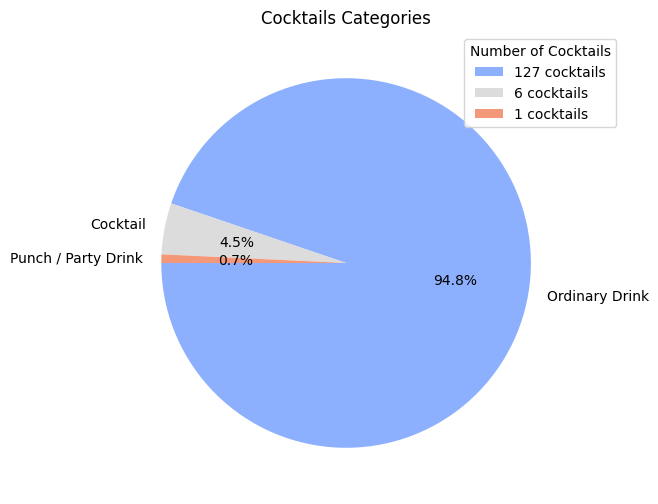

In [63]:
# Cocktails Categories
top_categories = cocktails['category'].value_counts()

# Create a bar plot using seaborn
plt.figure(figsize=(12, 6))

# Pie Chart
wedges, texts, autotexts = plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=180, colors=sns.color_palette('coolwarm', len(top_categories)))

# Add labels and title
plt.title('Cocktails Categories')

# Create custom labels for the legend that include category and number of cocktails
legend_labels = [f'{count} cocktails' for count in top_categories]

# Add the legend
plt.legend(wedges, legend_labels, title="Number of Cocktails", loc="upper right", bbox_to_anchor=(1.1, 1))


# Show the plot
plt.show()

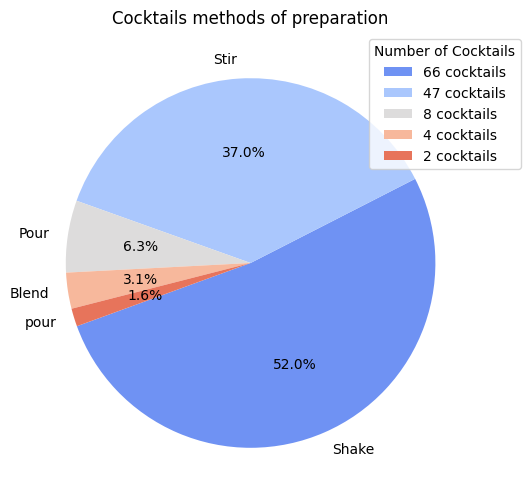

In [64]:
# Cocktails methods of preparation
prep_methods = cocktails['prep_method'].value_counts()

# Create a bar plot using seaborn
plt.figure(figsize=(12, 6))

# Pie Chart
wedges, texts, autotexts = plt.pie(prep_methods, labels=prep_methods.index, autopct='%1.1f%%', startangle=200, colors=sns.color_palette('coolwarm', len(prep_methods)))

# Add labels and title
plt.title('Cocktails methods of preparation')

# Create custom labels for the legend that include category and number of cocktails
legend_labels = [f'{count} cocktails' for count in prep_methods]

# Add the legend
plt.legend(wedges, legend_labels, title="Number of Cocktails", loc="upper right", bbox_to_anchor=(1.1, 1))


# Show the plot
plt.show()

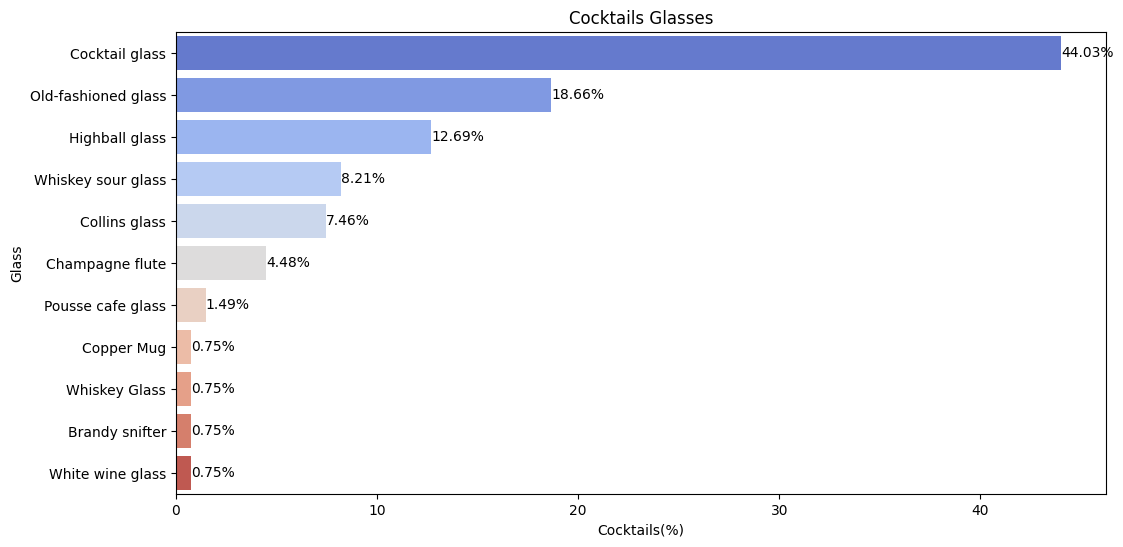

In [65]:
# Cocktails Glasses
top_categories = cocktails['glass'].value_counts()

# Create a bar plot using seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_categories.values / len(cocktails) * 100, y=top_categories.index, palette='coolwarm', hue=top_categories.index)

# Add labels and title
plt.xlabel('Cocktails(%)')
plt.ylabel('Glass')
plt.title('Cocktails Glasses')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%')

# Show the plot
plt.show()

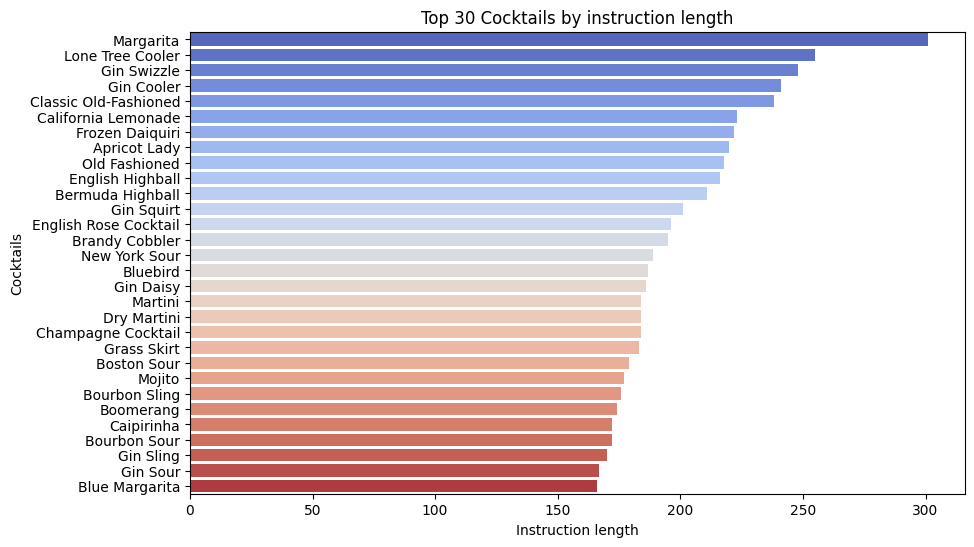

In [66]:
# Top N hardest to prepare cocktails
top_n = 30
hardest_cocktails = cocktails.sort_values(ascending=False, by='instruction_length').head(top_n)


# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=hardest_cocktails['instruction_length'], y=hardest_cocktails['name'], palette='coolwarm', hue=hardest_cocktails['name'])

# Add labels and title
plt.ylabel('Cocktails')
plt.xlabel('Instruction length')
plt.title(f'Top {top_n} Cocktails by instruction length')

# Show the plot
plt.show()

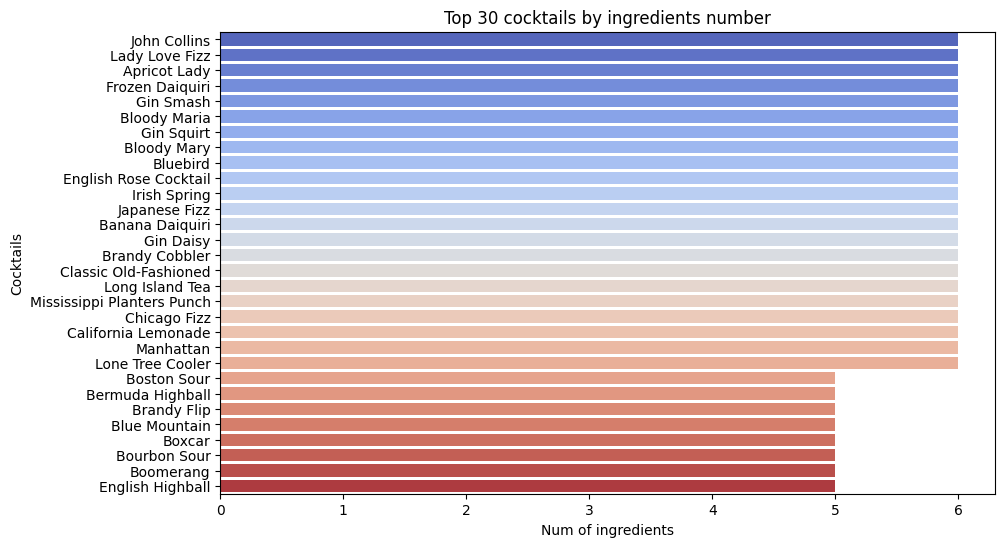

In [67]:
# Top N hardest to prepare cocktails
top_n = 30
hardest_cocktails = cocktails.sort_values(ascending=False, by='num_ingredients').head(top_n)


# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=hardest_cocktails['num_ingredients'], y=hardest_cocktails['name'], palette='coolwarm', hue=hardest_cocktails['name'])

# Add labels and title
plt.ylabel('Cocktails')
plt.xlabel('Num of ingredients')
plt.title(f'Top {top_n} cocktails by ingredients number')

# Show the plot
plt.show()

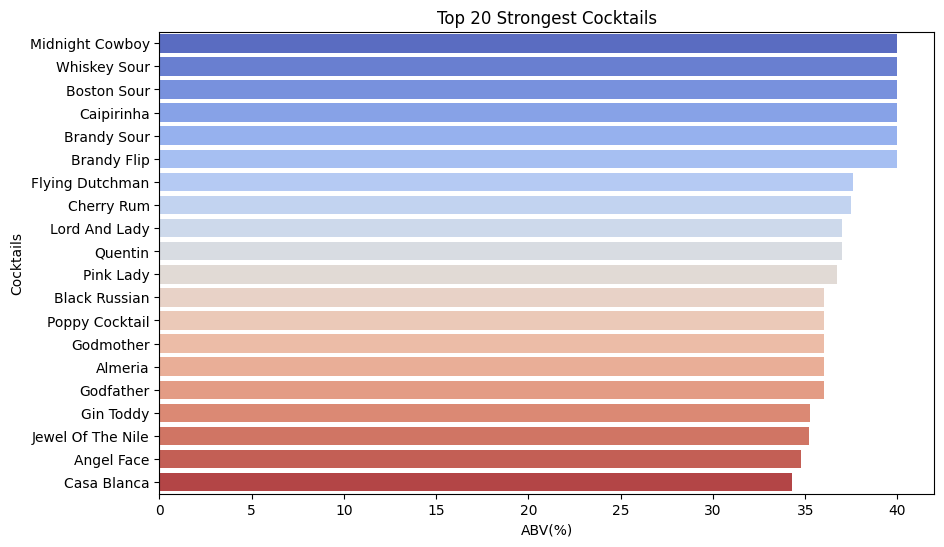

In [68]:
# Cocktails ABV rank
top_n = 20
strongest_cocktails = cocktails.sort_values(ascending=False, by='abv').head(top_n)

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=strongest_cocktails['abv'], y=strongest_cocktails['name'], palette='coolwarm', hue=strongest_cocktails['name'])

# Add labels and title
plt.ylabel('Cocktails')
plt.xlabel('ABV(%)')
plt.title(f'Top {top_n} Strongest Cocktails')

# Show the plot
plt.show()

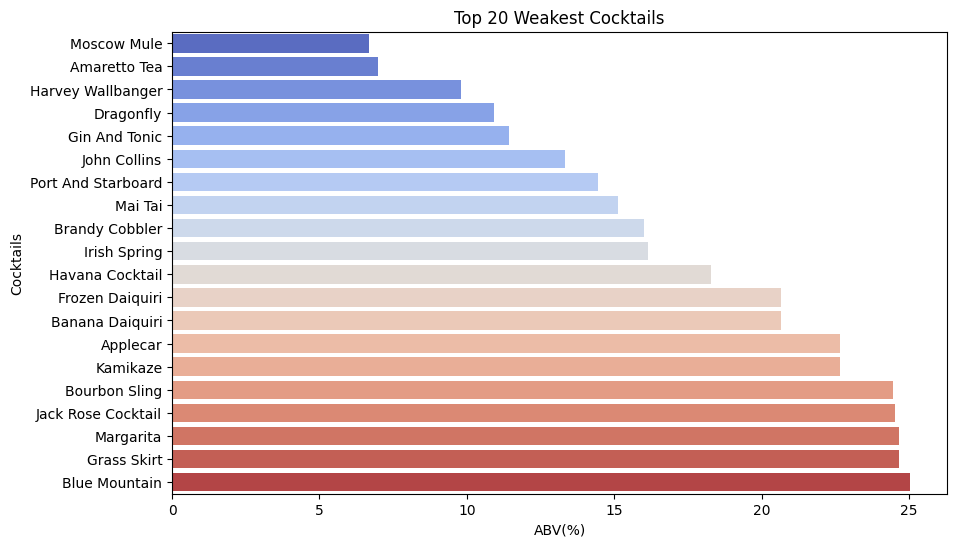

In [69]:
# Cocktails ABV rank
top_n = 20
strongest_cocktails = cocktails.sort_values(ascending=True, by='abv').head(top_n)

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=strongest_cocktails['abv'], y=strongest_cocktails['name'], palette='coolwarm', hue=strongest_cocktails['name'])

# Add labels and title
plt.ylabel('Cocktails')
plt.xlabel('ABV(%)')
plt.title(f'Top {top_n} Weakest Cocktails')

# Show the plot
plt.show()

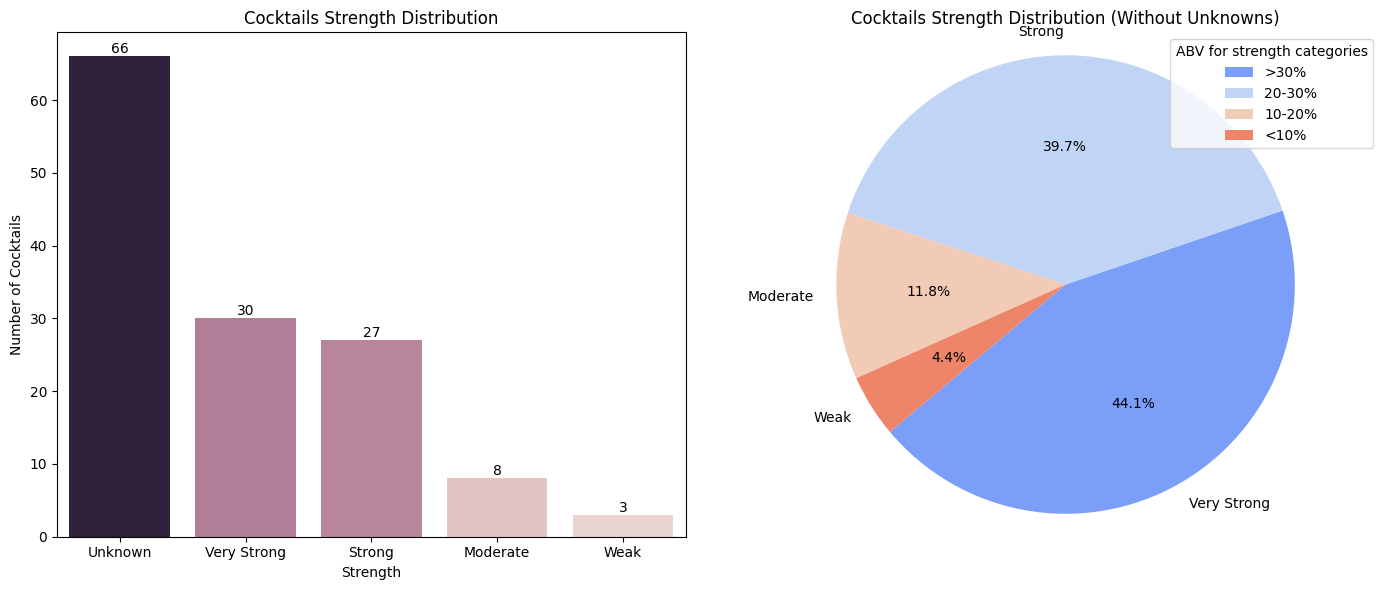

In [70]:
# Cocktails strength distribution
# Get the strengths distribution
strengths = cocktails['strength'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Bar Plot
sns.barplot(y=strengths.values, x=strengths.index, hue=strengths.values, ax=axs[0], legend=False)
axs[0].set_ylabel('Number of Cocktails')
axs[0].set_xlabel('Strength')
axs[0].set_title('Cocktails Strength Distribution')

# Add value labels on top of each bar
for i, v in enumerate(strengths.values):
    axs[0].text(i, v, str(v), ha='center', va='bottom')

strengths = cocktails.query('strength != "Unknown"')['strength'].value_counts()

# Pie Chart
wedges, texts, autotexts = axs[1].pie(strengths, labels=strengths.index, autopct='%1.1f%%', startangle=220, colors=sns.color_palette('coolwarm', len(strengths)))

axs[1].legend(wedges, ['>30%', '20-30%', '10-20%', '<10%'], title="ABV for strength categories", loc="best")

axs[1].axis('equal')  # Equal aspect ratio ensures that pie chart is circular
axs[1].set_title('Cocktails Strength Distribution (Without Unknowns)')

# Show the plots
plt.tight_layout()  # Adjusts the layout to prevent overlap
plt.show()

In [71]:
ingredients.sample(5)

,name,description,type,percentage,imageUrl,generalized_type
id,,,,,,
5,Scotch,"Scotch whisky, often simply called Scotch, is ...",Whisky,40.0,https://cocktails.solvro.pl/images/ingredients...,Alcoholic
299,lemon,"The lemon, Citrus limon (L.) Osbeck, is a spec...",Fruit,0.0,https://cocktails.solvro.pl/images/ingredients...,Fruit
32,Apricot Brandy,None,Brandy,24.0,https://cocktails.solvro.pl/images/ingredients...,Alcoholic
94,Celery Salt,None,None,0.0,https://cocktails.solvro.pl/images/ingredients...,<NA>
189,Dry Vermouth,Vermouth (/vərˈmuːθ/ ver-MOOTH; also UK: /ˈvɜː...,Fortified Wine,NaN,https://cocktails.solvro.pl/images/ingredients...,Alcoholic


In [72]:
ingredients.describe(include='object')

,name,description,type,imageUrl,generalized_type
count,102,51,84,101,89
unique,102,49,22,101,5
top,Amaretto,Vermouth (/vərˈmuːθ/ ver-MOOTH; also UK: /ˈvɜː...,Liqueur,https://cocktails.solvro.pl/images/ingredients...,Alcoholic
freq,1,2,21,1,53


In [73]:
ingredients.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 18 to 299
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              102 non-null    object 
 1   description       51 non-null     object 
 2   type              84 non-null     object 
 3   percentage        93 non-null     float64
 4   imageUrl          101 non-null    object 
 5   generalized_type  89 non-null     object 
dtypes: float64(1), object(5)
memory usage: 9.6+ KB


In [74]:
ingredients.isna().sum()

,0
name,0
description,51
type,18
percentage,9
imageUrl,1
generalized_type,13


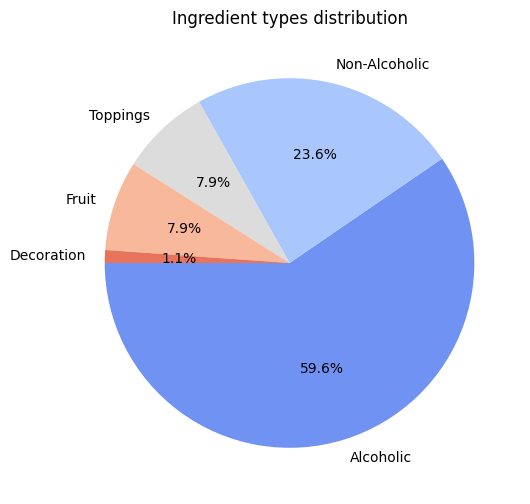

In [75]:
# Ingredient types distribution
ingredient_counts = ingredients['generalized_type'].value_counts()

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
plt.pie(ingredient_counts, labels=ingredient_counts.index, autopct='%1.1f%%', startangle=180, colors=sns.color_palette('coolwarm', len(ingredient_counts)))

# Add labels and title
plt.title('Ingredient types distribution')
plt.show()

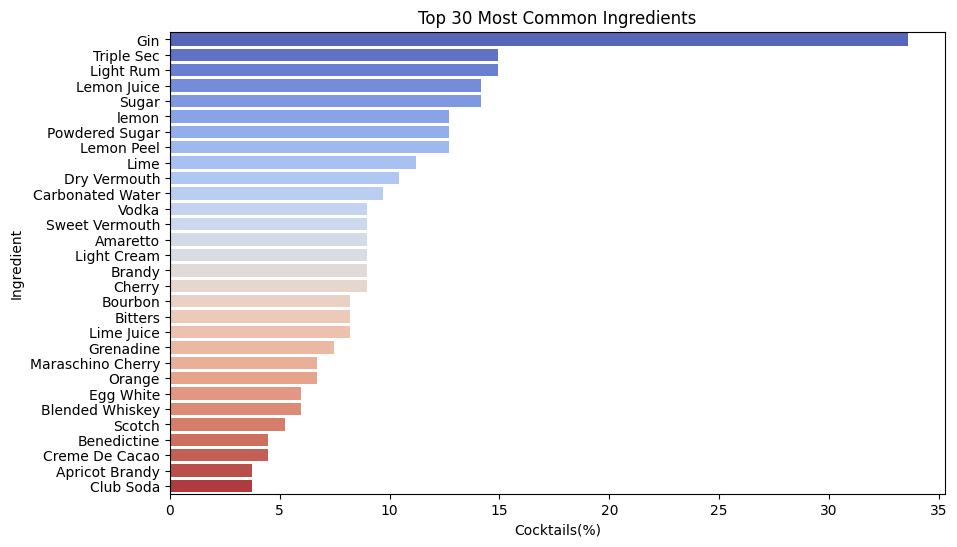

In [76]:
# Top N most common ingredients in cocktails
ingredient_counts = cocktails_and_ingredients['ingredient_name'].value_counts()

top_n = 30
top_ingredients = ingredient_counts.head(top_n)

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_ingredients.values / len(cocktails) * 100, y=top_ingredients.index, palette='coolwarm', hue=top_ingredients.index)

# Add labels and title
plt.xlabel('Cocktails(%)')
plt.ylabel('Ingredient')
plt.title(f'Top {top_n} Most Common Ingredients')

# Show the plot
plt.show()

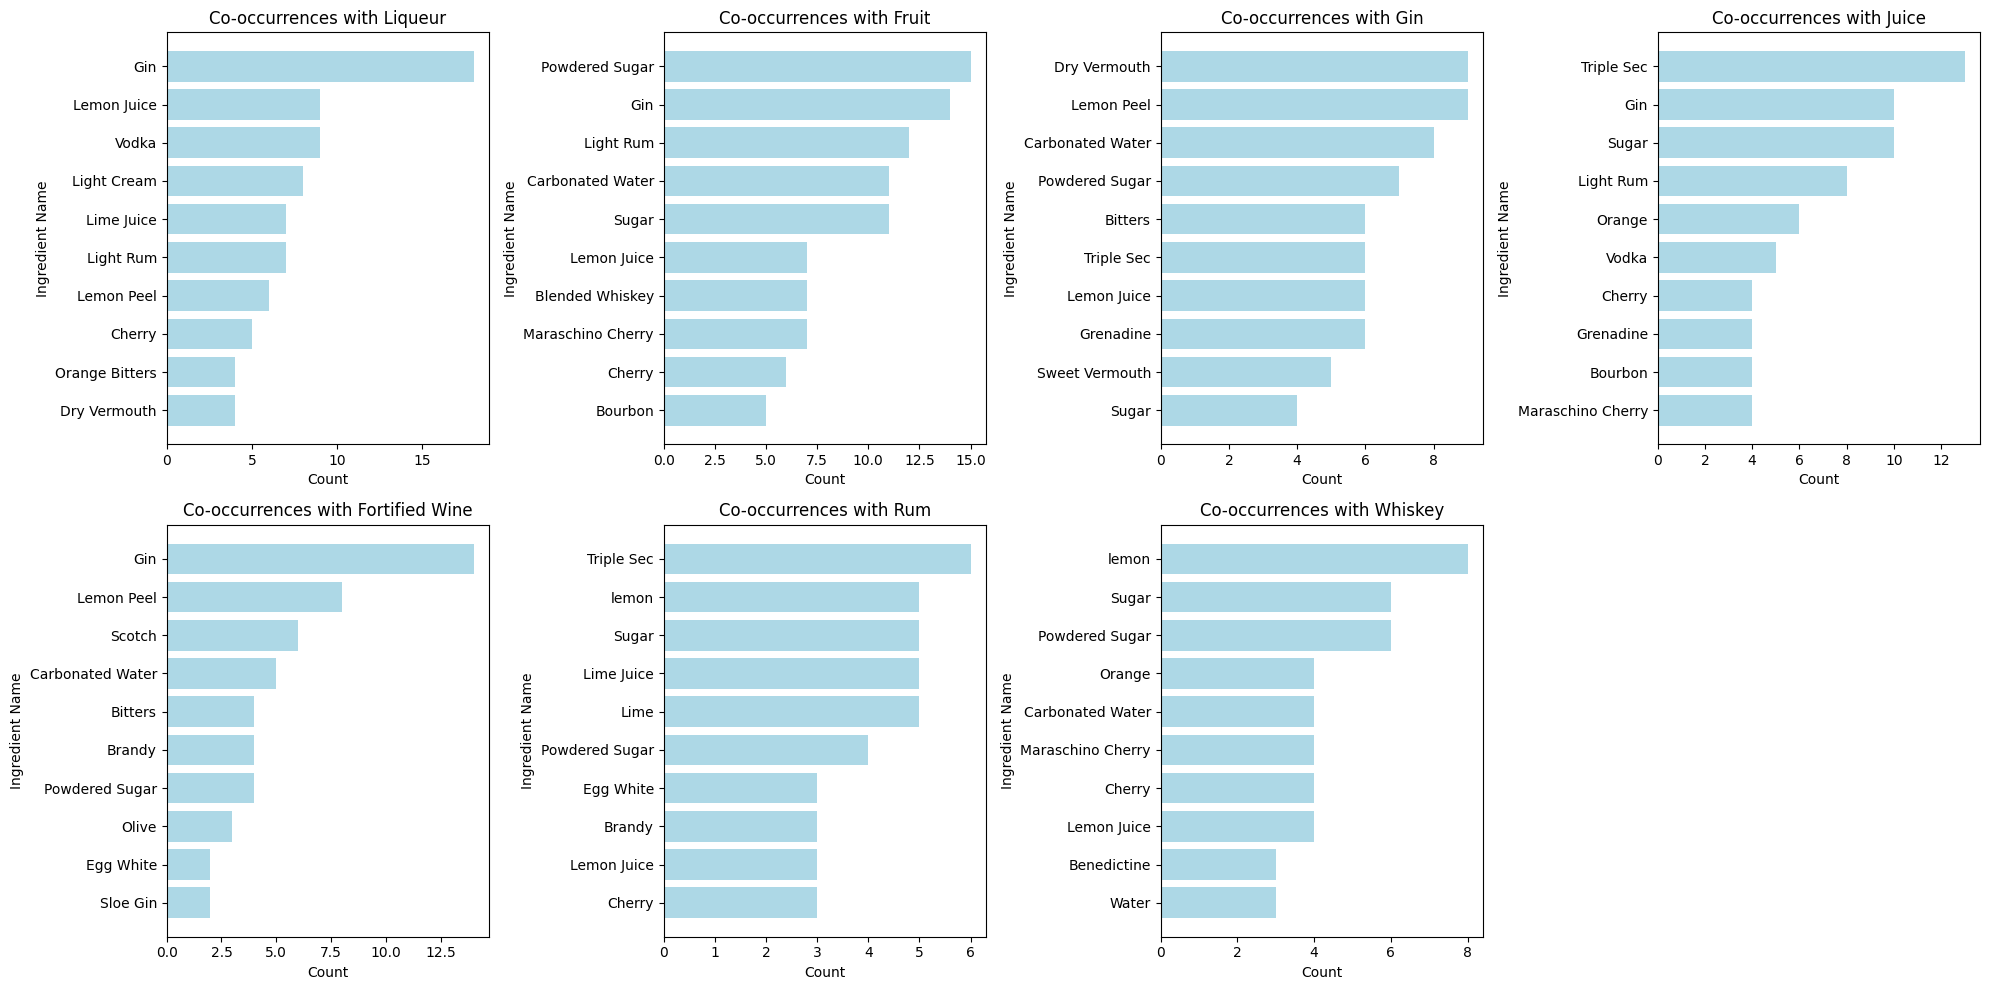

In [77]:
# Which ingredients tend to appear together in the same cocktails (Ingredient type and ingredients)
result_df = cocktails_and_ingredients.set_index('ingredient_id').join(ingredients[['generalized_type', 'name', 'type']], how='left')
most_frequent_types = result_df['type'].value_counts().index[:7]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()

for i, ingr_type in enumerate(most_frequent_types):
    cocktails_with_type = result_df[result_df['type'] == ingr_type]['cocktail_name'].unique()
    cocktails_with_type_df = result_df[result_df['cocktail_name'].isin(cocktails_with_type)]
    co_occurring_ingredients = cocktails_with_type_df[cocktails_with_type_df['type'] != ingr_type]
    co_occurrence_counts = co_occurring_ingredients['name'].value_counts().head(10).sort_values(ascending=True)

    axes[i].barh(co_occurrence_counts.index, co_occurrence_counts.values, color='lightblue')
    axes[i].set_title(f'Co-occurrences with {ingr_type}')
    axes[i].set_ylabel('Ingredient Name')
    axes[i].set_xlabel('Count')
    axes[i].tick_params(axis='y', rotation=0)



fig.delaxes(axes[7])

plt.tight_layout()
plt.show()

In [78]:
ingredients['type'].unique()

array(['Liqueur', 'Bitter', 'Brandy', 'Rum', None, 'Whiskey', 'Spirit',
       'Water', 'Wine', 'Cream', 'Soft Drink', 'Fortified Wine', 'Gin',
       'Juice', 'Syrup', 'Soda', 'Fruit', 'Vodka', 'Flower', 'Mineral',
       'Whisky', 'Sauce', 'Tea'], dtype=object)

In [79]:
cocktails_and_ingredients

,cocktail_id,cocktail_name,ingredient_id,ingredient_name,measure,volume_oz
0,0,Mojito,170,Soda water,None,NaN
1,0,Mojito,305,Light Rum,2-3 oz,2.500000
2,0,Mojito,312,Lime,Juice of 1,1.010000
3,0,Mojito,337,Mint,2-4,NaN
4,0,Mojito,476,Sugar,2 tsp,0.270000
...,...,...,...,...,...,...
526,132,Queen Elizabeth,189,Dry Vermouth,1/2 oz,0.500000
527,133,Quentin,179,Dark Rum,1 1/2 oz,1.500000
528,133,Quentin,282,Kahlua,1/2 oz,0.500000
529,133,Quentin,304,Light Cream,1 oz,1.000000


In [80]:
cocktails_and_ingredients.describe(include='object')

,cocktail_id,cocktail_name,ingredient_id,ingredient_name,measure
count,531,531,531,531,531
unique,134,134,102,102,73
top,103,John Collins,2,Gin,1 oz
freq,6,6,45,45,70


In [81]:
cocktails_and_ingredients['ingredient_name'].value_counts()

,count
ingredient_name,
Gin,45
Triple Sec,20
Light Rum,20
Lemon Juice,19
Sugar,19
...,...
Lemonade,1
Añejo Rum,1
Cachaca,1


In [82]:
cocktails_and_ingredients.groupby('ingredient_name')['volume_oz'].mean().sort_values(ascending=False).head(3)

,volume_oz
ingredient_name,
Ginger Ale,6.0
Tea,6.0
Tonic Water,5.0


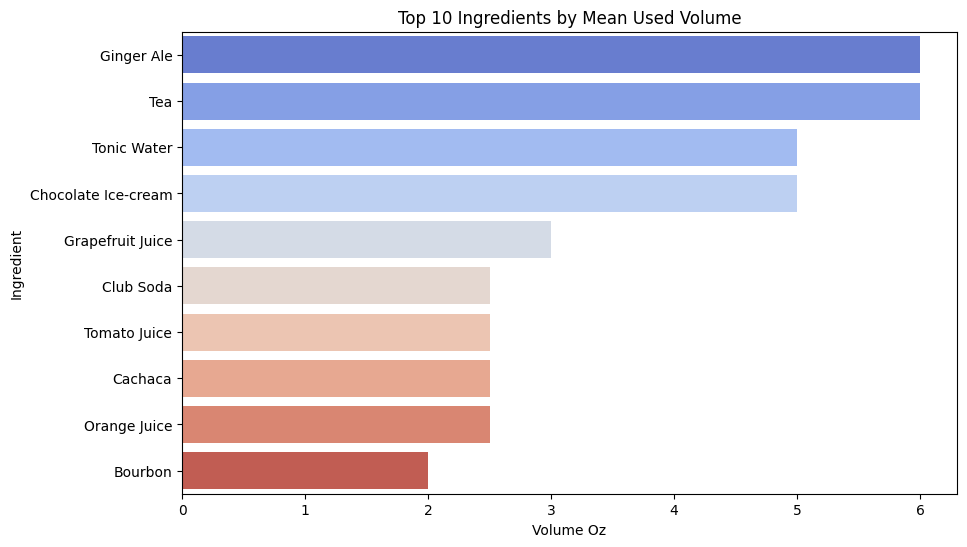

In [83]:
# Average volume of main ingredients used in cocktails
ingredients_and_volumes = cocktails_and_ingredients.groupby('ingredient_name')['volume_oz'].mean().sort_values(ascending=False)

top_n = 10
top_ingredients = ingredients_and_volumes.head(top_n)

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_ingredients.values, y=top_ingredients.index, palette='coolwarm', hue=top_ingredients.index)

# Add labels and title
plt.xlabel('Volume Oz')
plt.ylabel('Ingredient')
plt.title(f'Top {top_n} Ingredients by Mean Used Volume')

# Show the plot
plt.show()

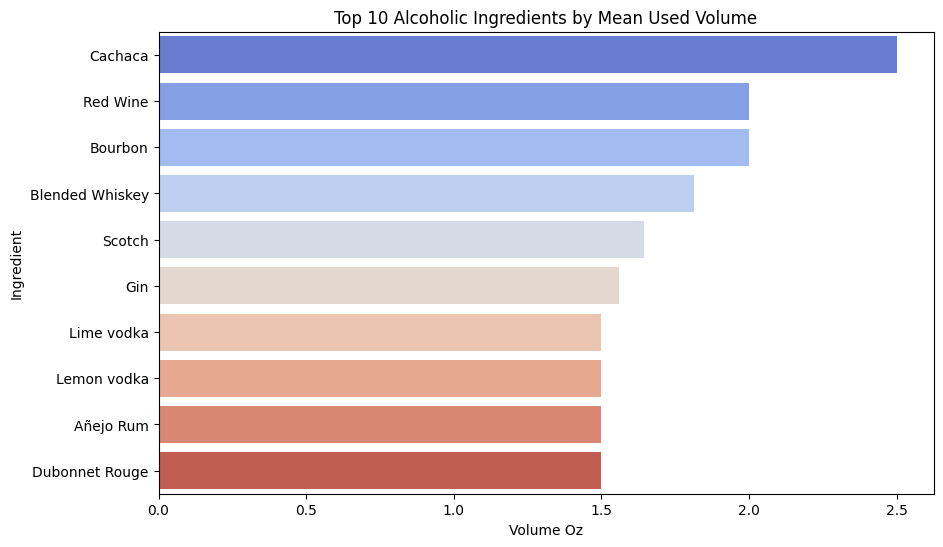

In [84]:
# Average volume of alcoholic ingredients used in cocktails
merged_df = pd.merge(ingredients, cocktails_and_ingredients, left_on='id', right_on='ingredient_id', how='inner')
ingredients_and_volumes = merged_df.query('generalized_type == "Alcoholic"').groupby('ingredient_name')['volume_oz'].mean().sort_values(ascending=False)

top_n = 10
top_ingredients = ingredients_and_volumes.head(top_n)

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_ingredients.values, y=top_ingredients.index, palette='coolwarm', hue=top_ingredients.index)

# Add labels and title
plt.xlabel('Volume Oz')
plt.ylabel('Ingredient')
plt.title(f'Top {top_n} Alcoholic Ingredients by Mean Used Volume')

# Show the plot
plt.show()

# Feature Relationships

In [85]:
ingredients.head(3)

,name,description,type,percentage,imageUrl,generalized_type
id,,,,,,
18,Amaretto,"Amaretto (Italian for ""a little bitter"") is a ...",Liqueur,28.0,https://cocktails.solvro.pl/images/ingredients...,Alcoholic
20,Angostura Bitters,Angostura bitters (English: /æŋɡəˈstjʊərə/) is...,Bitter,NaN,https://cocktails.solvro.pl/images/ingredients...,Alcoholic
26,Apple Brandy,None,Brandy,35.0,https://cocktails.solvro.pl/images/ingredients...,Alcoholic


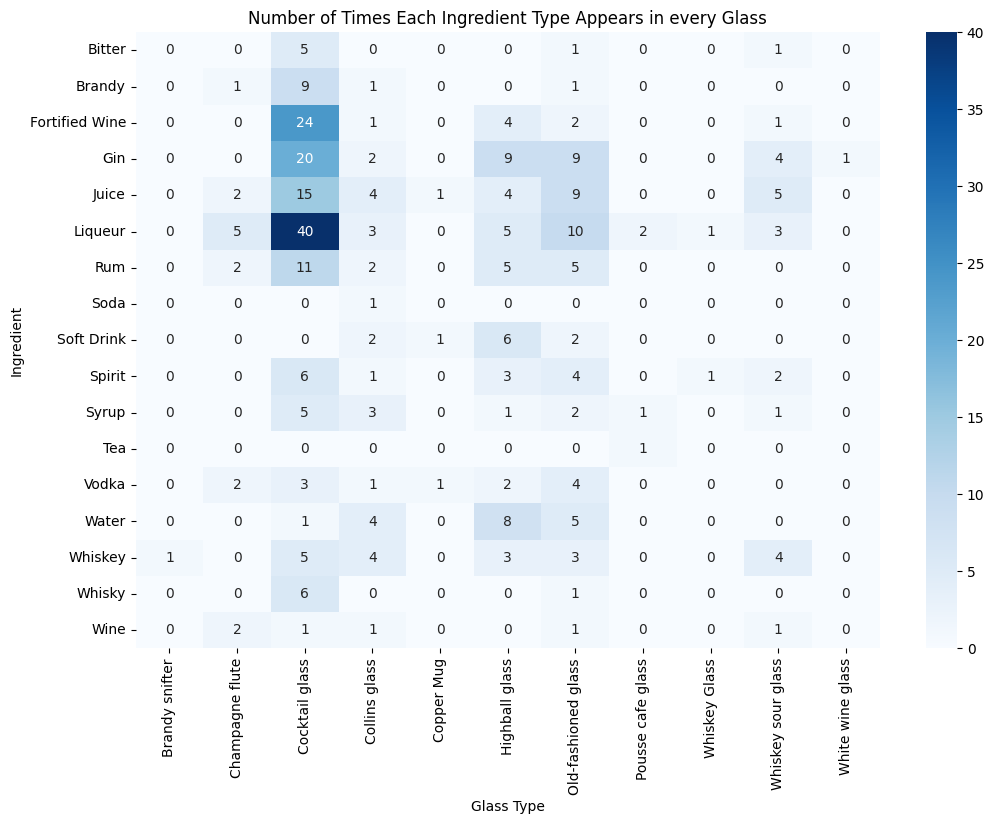

In [86]:
# Which glass types are used with ingredients types

# Function to get ingredients for a given cocktail name
def get_ingredients(cocktail_name):
    # Join dataframes to get the necessary information
    result_df = cocktails_and_ingredients.set_index('ingredient_id').join(ingredients[['generalized_type', 'name', 'type']], how='left')

    # Filter for the current cocktail
    group = result_df[result_df['cocktail_name'] == cocktail_name]

    ingrs = []

    for index, row in group.iterrows():
        # Only consider Alcoholic and Non-Alcoholic ingredients
        if pd.notna(row['generalized_type']):
          if row['generalized_type'] in ('Alcoholic', 'Non-Alcoholic') and row['volume_oz'] is not None:
              ingrs.append(row['type'])  # Collect ingredient names

    return ingrs

# Initialize a list to hold ingredient and glass type pairs
ingredients_list = []

# Collect ingredients for each cocktail along with their glass types
for index, row in cocktails.iterrows():
    cocktail_name = row['name']
    glass_type = row['glass']

    # Get ingredients for the cocktail
    ingrs = get_ingredients(cocktail_name)

    # Create a list of (ingredient, glass type) pairs
    for ingredient in ingrs:
        ingredients_list.append({'ingredient': ingredient, 'glass': glass_type})

# Create a DataFrame from the ingredients list
df = pd.DataFrame(ingredients_list)

# Count occurrences of each ingredient for each glass type
pivot_table = df.pivot_table(index='ingredient', columns='glass', aggfunc='size', fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='g')

# Add titles and labels
plt.title('Number of Times Each Ingredient Type Appears in every Glass')
plt.xlabel('Glass Type')
plt.ylabel('Ingredient')

# Show the chart
plt.show()

In [87]:
cocktails

,name,category,glass,tags,instructions,abv,strength,instruction_length,num_ingredients,prep_method
0,Mojito,Cocktail,Highball glass,"[IBA, ContemporaryClassic, Alcoholic, USA, Asi...",Muddle mint leaves with sugar and lime juice. ...,NaN,Unknown,177,5,Pour
1,Old Fashioned,Cocktail,Old-fashioned glass,"[IBA, Classic, Alcoholic, Expensive, Savory]",Place sugar cube in old fashioned glass and sa...,NaN,Unknown,218,4,NaN
2,Long Island Tea,Ordinary Drink,Highball glass,"[Strong, Asia, StrongFlavor, Brunch, Vegetaria...",Combine all ingredients (except cola) and pour...,NaN,Unknown,152,6,pour
3,Negroni,Ordinary Drink,Old-fashioned glass,"[IBA, Classic]","Stir into glass over ice, garnish and serve.",NaN,Unknown,44,3,Stir
4,Whiskey Sour,Ordinary Drink,Old-fashioned glass,"[IBA, Classic, Alcoholic, ContemporaryClassic]","Shake with ice. Strain into chilled glass, gar...",40.0,Very Strong,148,4,Shake
...,...,...,...,...,...,...,...,...,...,...
129,Quarter Deck Cocktail,Ordinary Drink,Cocktail glass,None,"Stir all ingredients with ice, strain into a c...",NaN,Unknown,71,3,Stir
130,Queen Bee,Ordinary Drink,Cocktail glass,None,"Shake all ingredients with ice, strain into a ...",NaN,Unknown,72,3,Shake
131,Queen Charlotte,Ordinary Drink,Collins glass,None,Pour red wine and grenadine into a collins gla...,NaN,Unknown,108,3,Stir
132,Queen Elizabeth,Ordinary Drink,Cocktail glass,None,"Stir all ingredients with ice, strain into a c...",NaN,Unknown,71,3,Stir


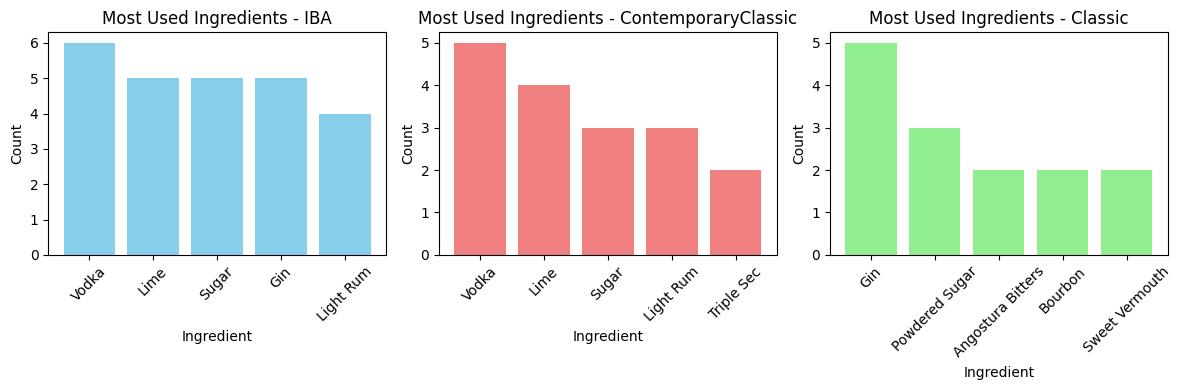

In [88]:
# Most used ingredients for IBA, ConremporaryClassic and Classic cocktails
cocktails_and_tags = cocktails.explode('tags')
result_df = cocktails_and_ingredients.set_index('cocktail_name').join(cocktails_and_tags.set_index('name')[['tags']], how='left')
result_df

iba_ingrs = result_df[result_df['tags'] == 'IBA']['ingredient_name'].value_counts().head(5)
conclassic_ingrs = result_df[result_df['tags'] == 'ContemporaryClassic']['ingredient_name'].value_counts().head(5)
classic_ingrs = result_df[result_df['tags'] == 'Classic']['ingredient_name'].value_counts().head(5)

# Create subplots: 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot for IBA ingredients
axes[0].bar(iba_ingrs.index, iba_ingrs.values, color='skyblue')
axes[0].set_title('Most Used Ingredients - IBA')
axes[0].set_xlabel('Ingredient')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Plot for ContemporaryClassic ingredients
axes[1].bar(conclassic_ingrs.index, conclassic_ingrs.values, color='lightcoral')
axes[1].set_title('Most Used Ingredients - ContemporaryClassic')
axes[1].set_xlabel('Ingredient')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Plot for Classic ingredients
axes[2].bar(classic_ingrs.index, classic_ingrs.values, color='lightgreen')
axes[2].set_title('Most Used Ingredients - Classic')
axes[2].set_xlabel('Ingredient')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [89]:
# We see that classic cocktails are tend to be made with Gin (Martini and etc.), while Contemporary Classics are more focused on Vodka with Lime. And IBA cocktails are mainly made with Vodka and Gin

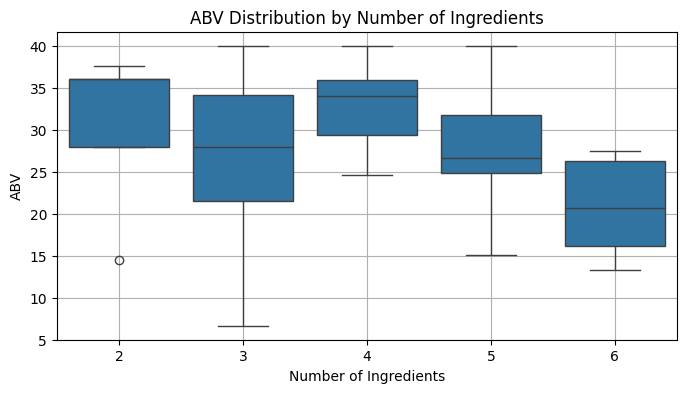

In [90]:
# ABV of cocktails distribution by number of ingredients

plt.figure(figsize=(8, 4))
sns.boxplot(data=cocktails, x='num_ingredients', y='abv')
plt.xlabel('Number of Ingredients')
plt.ylabel('ABV')
plt.title('ABV Distribution by Number of Ingredients')
plt.grid(True)
plt.show()

In [91]:
from collections import defaultdict

def optimize_cocktail_ingredients(df, num_ingredients):
    # Create mappings of cocktails to ingredients
    cocktail_ingredients = defaultdict(set)
    all_ingredients = set()
    for _, row in df.iterrows():
        cocktail_ingredients[row['cocktail_name']].add(row['ingredient_name'])
        all_ingredients.add(row['ingredient_name'])

    # Create the optimization problem
    prob = pulp.LpProblem("Cocktail_Optimizer", pulp.LpMaximize)

    # Decision variables
    # x[i] = 1 if ingredient i is selected, 0 otherwise
    x = pulp.LpVariable.dicts("ingredient",
                             all_ingredients,
                             cat='Binary')

    # y[c] = 1 if cocktail c can be made, 0 otherwise
    y = pulp.LpVariable.dicts("cocktail",
                             cocktail_ingredients.keys(),
                             cat='Binary')

    # Objective: Maximize number of possible cocktails
    prob += pulp.lpSum(y[c] for c in cocktail_ingredients.keys())

    # Constraint: Can only select num_ingredients ingredients
    prob += pulp.lpSum(x[i] for i in all_ingredients) == num_ingredients

    # Constraints: A cocktail can only be made if all its ingredients are selected
    for cocktail, ingredients in cocktail_ingredients.items():
        for ingredient in ingredients:
            prob += y[cocktail] <= x[ingredient]

    # Solve the problem
    prob.solve(pulp.PULP_CBC_CMD(msg=False))

    # Get results
    selected_ingredients = [i for i in all_ingredients if x[i].value() == 1]
    makeable_cocktails = [c for c in cocktail_ingredients.keys()
                         if y[c].value() == 1]

    # Calculate how many cocktails each selected ingredient is used in
    ingredient_usage = defaultdict(int)
    for cocktail in makeable_cocktails:
        for ingredient in cocktail_ingredients[cocktail]:
            if ingredient in selected_ingredients:
                ingredient_usage[ingredient] += 1

    return {
        'selected_ingredients': selected_ingredients,
        'num_cocktails': len(makeable_cocktails),
        'makeable_cocktails': sorted(makeable_cocktails),
        'ingredient_usage': ingredient_usage
    }

def print_results(result):
    print(f"\nOptimal solution found!")
    print(f"With {len(result['selected_ingredients'])} ingredients, you can make {result['num_cocktails']} cocktails!")

    print("\nSelected ingredients and their usage:")
    for i, ingredient in enumerate(sorted(result['selected_ingredients'],
                                        key=lambda x: result['ingredient_usage'][x],
                                        reverse=True), 1):
        uses = result['ingredient_usage'][ingredient]
        print(f"{i}. {ingredient} (used in {uses} cocktails)")

    print("\nCocktails you can make:")
    for cocktail in result['makeable_cocktails']:
        print(f"- {cocktail}")


# Run the optimization
result = optimize_cocktail_ingredients(cocktails_and_ingredients, num_ingredients=7)
print_results(result)


Optimal solution found!
With 7 ingredients, you can make 8 cocktails!

Selected ingredients and their usage:
1. Amaretto (used in 4 cocktails)
2. Gin (used in 4 cocktails)
3. Light Cream (used in 3 cocktails)
4. Creme De Cacao (used in 3 cocktails)
5. Sweet Vermouth (used in 2 cocktails)
6. Bitters (used in 2 cocktails)
7. Vodka (used in 1 cocktails)

Cocktails you can make:
- Almond Joy
- Amaretto And Cream
- Artillery
- Foxy Lady
- Godmother
- Lone Tree Cocktail
- Pink Gin
- Poppy Cocktail


In [92]:
# Well that's pretty interesting, but as a result we get very similar cocktails with the same main alcohol ingredient
# Let's assume I am a poor student who wants to make as much as possible cocktails with different bases(main alcohol ingredient), I can afford buying only 3 different alcohols,
# while the rest of ingredients won't be a problem, as they are very cheap
# Let's find N base ingredients with which we can make the most amount of cocktails

result_df = cocktails_and_ingredients.set_index('ingredient_id').join(ingredients[['generalized_type']], how='left')
cocktails_bases = result_df.query('generalized_type == "Alcoholic"')

# Run the optimization
result = optimize_cocktail_ingredients(cocktails_bases, num_ingredients=3)
print_results(result)


Optimal solution found!
With 3 ingredients, you can make 25 cocktails!

Selected ingredients and their usage:
1. Gin (used in 16 cocktails)
2. Light Rum (used in 9 cocktails)
3. Triple Sec (used in 7 cocktails)

Cocktails you can make:
- Banana Daiquiri
- Boxcar
- Cuba Libre
- Daiquiri
- Dragonfly
- Flying Dutchman
- Frozen Daiquiri
- Frozen Mint Daiquiri
- Frozen Pineapple Daiquiri
- Gin And Tonic
- Gin Cooler
- Gin Daisy
- Gin Fizz
- Gin Sling
- Gin Smash
- Gin Sour
- Gin Squirt
- Gin Toddy
- Grass Skirt
- Havana Cocktail
- Hawaiian Cocktail
- Lady Love Fizz
- Mai Tai
- Mojito
- Pink Lady


In [93]:
# Now let's see what are the rest of ingredients we shold by to make all theese cocktails
makeable_cocktails = result['makeable_cocktails']

result_df.query('cocktail_name in @makeable_cocktails & generalized_type != "Alcoholic"')['ingredient_name'].unique()

array(['Soda water', 'Lime', 'Mint', 'Sugar', 'Powdered Sugar', 'Banana',
       'Cherry', 'Lime Juice', 'Egg White', 'Grenadine', 'Lemon Juice',
       'Coca-Cola', 'Ginger Ale', 'Ice', 'Pineapple', 'Tonic Water',
       'Carbonated Water', 'Lemon Peel', 'Orange spiral',
       'Maraschino Cherry', 'Orange', 'lemon', 'Orange Peel', 'Water',
       'Strawberries', 'Pineapple Juice', 'Light Cream', 'Orgeat Syrup',
       'Sweet and Sour'], dtype=object)

In [94]:
# And as we see, rest of ingredients are usually really cheap and it won't be a problem to buy some of them

# Clustering

In [95]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.cluster import KMeans


# Assuming cocktails_and_ingredients is your original DataFrame
# Create a DataFrame with the relevant columns
volume_df = cocktails_and_ingredients[['cocktail_name', 'ingredient_name', 'volume_oz']].fillna(0.01)

# Create a pivot table to reshape the DataFrame
cocktail_matrix = volume_df.pivot_table(index='cocktail_name',
                                         columns='ingredient_name',
                                         values='volume_oz',
                                         fill_value=0)


# Initialize the QuantileTransformer
quantile_transformer = QuantileTransformer(random_state=42, n_quantiles=100)

# Fit and transform the data
transformed_matrix = quantile_transformer.fit_transform(cocktail_matrix)

# Convert the transformed matrix back to a DataFrame for easier handling
cocktail_matrix = pd.DataFrame(transformed_matrix, index=cocktail_matrix.index, columns=cocktail_matrix.columns)


# Apply K-means clustering
n_clusters = 5  # 5 because: sweet, sour, bitter, spicy and salty
kmeans = KMeans(n_clusters=n_clusters, random_state=20)
clusters = kmeans.fit_predict(cocktail_matrix)

# Add cluster assignments back to original data
results = pd.DataFrame({
    'cocktail': cocktail_matrix.index,
    'cluster': clusters
})

print(results)

# # Show cocktails in each cluster
# for cluster in range(n_clusters):
#     print(f"\nCluster {cluster}:")
#     cluster_cocktails = results[results['cluster'] == cluster]['cocktail']
#     print(cluster_cocktails.tolist())
#     # Show common ingredients in this cluster
#     cluster_recipes = cocktail_matrix.loc[cluster_cocktails]
#     # print(f"Cluster recipes: {cluster_recipes}")  # Fixed this line
#     common_ingredients = cluster_recipes.sum().nlargest(5)
#     print("Most common ingredients:", common_ingredients.index.tolist())

                  cocktail  cluster
0    After Dinner Cocktail        3
1    After Supper Cocktail        3
2          Alabama Slammer        4
3          Alaska Cocktail        1
4                Alexander        2
..                     ...      ...
129              Queen Bee        4
130        Queen Charlotte        4
131        Queen Elizabeth        1
132                Quentin        2
133           Whiskey Sour        4

[134 rows x 2 columns]


In [96]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
cocktail_coords = pca.fit_transform(cocktail_matrix)

cocktail_df = pd.DataFrame(cocktail_coords, columns=['PC1', 'PC2'])
cocktail_df['cocktail_name'] = cocktail_matrix.index
cocktail_df['cluster'] = clusters  # Add cluster labels

# Create a color mapping
color_map = {
    0: 'blue',
    1: 'orange',
    2: 'green',
    3: 'red',
    4: 'purple'
}

# Map the cluster labels to colors
cocktail_df['color'] = cocktail_df['cluster'].map(color_map)

# Create the interactive scatter plot with colors
fig = px.scatter(cocktail_df, x='PC1', y='PC2',
                 text='cocktail_name',
                 color='color',
                 title='Cocktail Clusters based on Ingredients',
                 color_discrete_sequence=cocktail_df['color'].unique(),
                 width=1200,  # Set the width of the figure
                 height=800)   # Set the height of the figure  # Set discrete colors

fig.update_traces(textposition='top center')  # Adjust text position
fig.show()


In [97]:
cocktails_and_ingredients.query('cocktail_name == "Bloody Mary" | cocktail_name == "Amaretto Rose"')

,cocktail_id,cocktail_name,ingredient_id,ingredient_name,measure,volume_oz
87,24,Amaretto Rose,18,Amaretto,1 1/2 oz,1.5000
88,24,Amaretto Rose,127,Club Soda,None,NaN
89,24,Amaretto Rose,308,Lime Juice,1/2 oz,0.5000
146,40,Bloody Mary,1,Vodka,1 1/2 oz,1.5000
147,40,Bloody Mary,293,Lemon Juice,1 dash,NaN
148,40,Bloody Mary,312,Lime,1 wedge,NaN
149,40,Bloody Mary,483,Tabasco Sauce,2-3 drops,NaN
150,40,Bloody Mary,492,Tomato Juice,3 oz,3.0000
151,40,Bloody Mary,529,Worcestershire Sauce,1/2 tsp,0.0675


Top Ingredients for PC1:
ingredient_name
Powdered Sugar       0.528245
lemon                0.473379
Carbonated Water     0.397594
Blended Whiskey      0.242519
Egg White            0.173148
                       ...   
Orange              -0.120617
Maraschino Cherry   -0.143037
Triple Sec          -0.154435
Sugar               -0.183518
Lemon Juice         -0.214724
Name: 0, Length: 102, dtype: float64


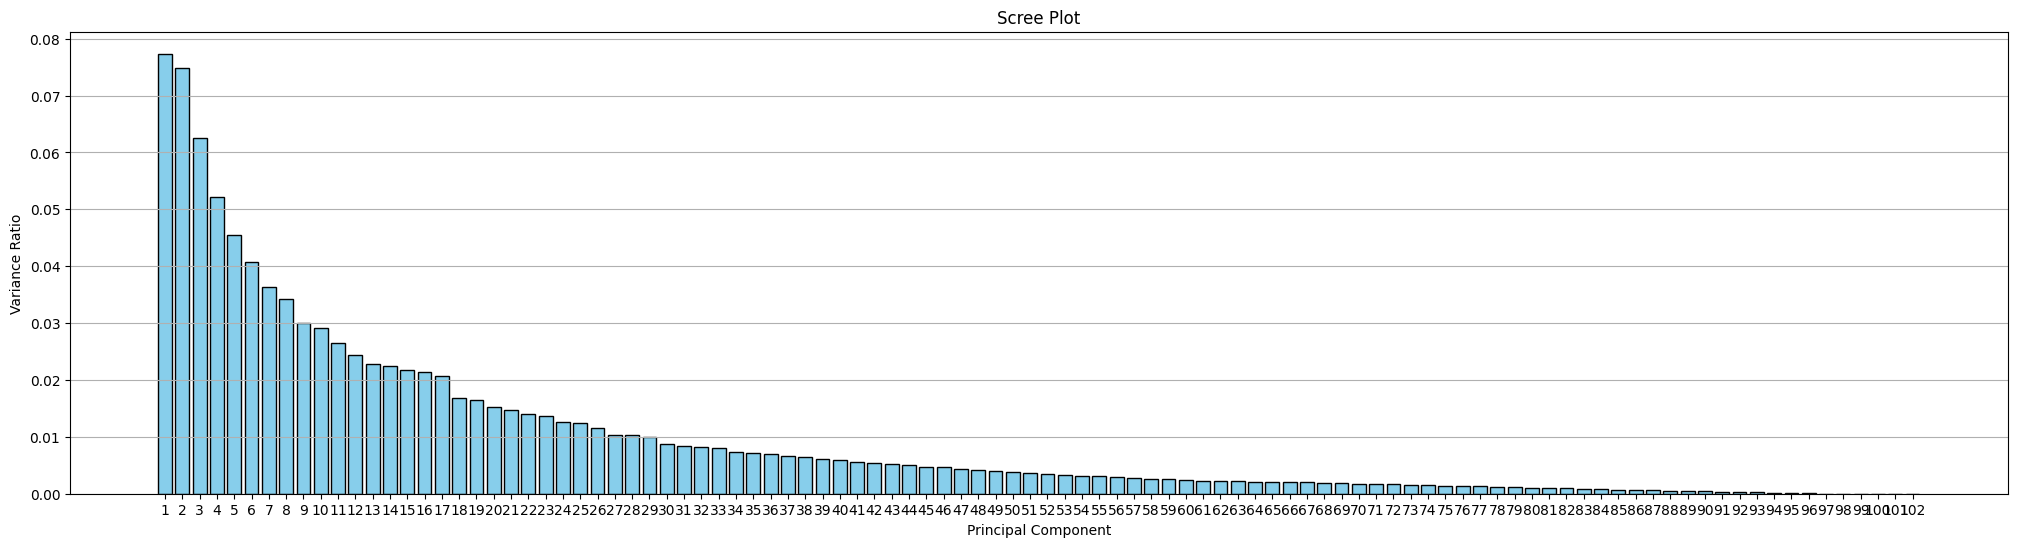

In [98]:
# Assume cocktail_matrix is your original data (ingredient matrix)
pca = PCA()
fit_result = pca.fit(cocktail_matrix)

loadings = pca.components_

# Create a DataFrame for better visualization of loadings
loadings_df = pd.DataFrame(loadings, columns=cocktail_matrix.columns)

# Get loadings for PC1
pc1_loadings = loadings_df.iloc[0]

# Sort the loadings for PC1
sorted_pc1_loadings = pc1_loadings.sort_values(ascending=False)

# Display the top ingredients contributing to PC1
print("Top Ingredients for PC1:")
print(sorted_pc1_loadings)  # Top 10 ingredients

# Get the explained variance ratios
explained_variance = pca.explained_variance_ratio_

# Create a bar plot for the scree plot
plt.figure(figsize=(25, 6))
plt.bar(np.arange(1, len(explained_variance) + 1), explained_variance, color='skyblue', edgecolor='black')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance) + 1))  # Set the x-axis to match component numbers
plt.grid(True, axis='y')  # Add horizontal grid lines for better readability
plt.show()

In [99]:
# Widać że owszem PC1 i PC2 mają największe wartości wariancji, ale z tego faktu że suma ich wariancji wynosi tylko ~16.5% od całej wariancji, wynika to że
# na wykresie PCA nie da się za bardzo zobaczyć tego rozdzielenia na klastery, chociaż też troche widać dla zielonych i pomarańczowych,
# a dla granatowych może być wchodzi w grę PC3 i tak naprawdę granatowe są razem dlatego że są rozmieszczeni bardziej z "przodu" według osi prostokątnej do pozostałych, skierowanej w stronę od monitora

# Dzięki temu rozdzieleniu będziemy w stanie określić jakie koktajle są podobne do jakich, i zaoferować naszym gościom koktajl mniej lub więcej podobny do ich ulubionego)

In [100]:
# Clusterize by ABV and main ingredient type
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


# Set index on 'cocktail_name' in the first DataFrame and 'name' in the second DataFrame
result_df = cocktails_and_ingredients.set_index('cocktail_name').join(
    cocktails.set_index('name')[['abv']],
    how='left'
).reset_index()  # Reset index to restore 'cocktail_name' as a column

result_df = ingredients[['name', 'type']].merge(result_df, left_on = 'name', right_on='ingredient_name', how='inner')

result_df.dropna(subset=['volume_oz', 'abv', 'type'], inplace=True)
result_df.drop(columns=['name'], inplace=True)

result_df.sort_values(by='cocktail_name', ascending=True, inplace=True)




cocktail_matrix = pd.crosstab(result_df['cocktail_name'], result_df['type'])
cocktail_matrix = cocktail_matrix.join(cocktails[['name', 'abv']].dropna(subset=['abv']).set_index('name'), on='cocktail_name', rsuffix='_cocktail')

cocktail_matrix.replace(2, 1, inplace=True)




# Initialize the QuantileTransformer
quantile_transformer = QuantileTransformer(random_state=42, n_quantiles=100)

# Fit and transform the data
transformed_matrix = quantile_transformer.fit_transform(cocktail_matrix)

# Convert the transformed matrix back to a DataFrame for easier handling
cocktail_matrix = pd.DataFrame(transformed_matrix, index=cocktail_matrix.index, columns=cocktail_matrix.columns)


# Apply K-means clustering
n_clusters = 5  # 5 because: sweet, sour, bitter, spicy and salty
kmeans = KMeans(n_clusters=n_clusters, random_state=20)
clusters = kmeans.fit_predict(cocktail_matrix)

# Add cluster assignments back to original data
results = pd.DataFrame({
    'cocktail': cocktail_matrix.index,
    'cluster': clusters
})

print(results)

# Show cocktails in each cluster
for cluster in range(n_clusters):
    print(f"\nCluster {cluster}:")
    cluster_cocktails = results[results['cluster'] == cluster]['cocktail']
    print(cluster_cocktails.tolist())
    # Show common ingredients in this cluster
    cluster_recipes = cocktail_matrix.loc[cluster_cocktails]
    # print(f"Cluster recipes: {cluster_recipes}")  # Fixed this line
    common_ingredients = cluster_recipes.sum().nlargest(5)
    print("Most common ingredients:", common_ingredients.index.tolist())

                 cocktail  cluster
0   After Dinner Cocktail        3
1   After Supper Cocktail        2
2               Alexander        3
3                 Almeria        1
4              Almond Joy        3
..                    ...      ...
63         Poppy Cocktail        0
64     Port And Starboard        3
65      Quaker's Cocktail        1
66                Quentin        1
67           Whiskey Sour        4

[68 rows x 2 columns]

Cluster 0:
['Angel Face', 'Arthur Tompkins', 'Boxcar', 'Dragonfly', 'Flying Dutchman', 'Gin And Tonic', 'Gin Daisy', 'Gin Sling', 'Gin Smash', 'Gin Sour', 'Gin Toddy', 'Grass Skirt', 'Hawaiian Cocktail', 'Jack Rose Cocktail', 'Jewel Of The Nile', 'Pink Lady', 'Poppy Cocktail']
Most common ingredients: ['Gin', 'abv', 'Juice', 'Syrup', 'Liqueur']

Cluster 1:
['Almeria', 'Boston Sidecar', 'Brandy Cobbler', 'Brandy Flip', 'Brandy Sour', 'Caipirinha', 'Cherry Rum', 'Daiquiri', 'Lord And Lady', 'Mai Tai', 'Midnight Cowboy', "Quaker's Cocktail", 'Quentin']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2785: UserWarning:

n_quantiles (100) is greater than the total number of samples (68). n_quantiles is set to n_samples.



In [101]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
cocktail_coords = pca.fit_transform(cocktail_matrix)

cocktail_df = pd.DataFrame(cocktail_coords, columns=['PC1', 'PC2'])
cocktail_df['cocktail_name'] = cocktail_matrix.index
cocktail_df['cluster'] = clusters  # Add cluster labels

# Create a color mapping
color_map = {
    0: 'blue',
    1: 'orange',
    2: 'green',
    3: 'red',
    4: 'purple'
}

# Map the cluster labels to colors
cocktail_df['color'] = cocktail_df['cluster'].map(color_map)

# Create the interactive scatter plot with colors
fig = px.scatter(cocktail_df, x='PC1', y='PC2',
                 text='cocktail_name',
                 color='color',
                 title='Cocktail Clusters based on Ingredients types and ABV',
                 color_discrete_sequence=cocktail_df['color'].unique(),
                 width=1200,  # Set the width of the figure
                 height=800)   # Set the height of the figure  # Set discrete colors

fig.update_traces(textposition='top center')  # Adjust text position
fig.show()


In [102]:
cocktails_and_ingredients.query('cocktail_name == "Arthur Tompkins" | cocktail_name == "Hawaiian Cocktail"')

,cocktail_id,cocktail_name,ingredient_id,ingredient_name,measure,volume_oz
113,32,Arthur Tompkins,2,Gin,2 oz,2.00
114,32,Arthur Tompkins,238,Grand Marnier,1/2 oz,0.50
115,32,Arthur Tompkins,293,Lemon Juice,2 tsp,0.27
116,32,Arthur Tompkins,294,Lemon Peel,1 twist of,NaN
388,96,Hawaiian Cocktail,2,Gin,2 oz,2.00
389,96,Hawaiian Cocktail,393,Pineapple Juice,1 tblsp,0.47
390,96,Hawaiian Cocktail,498,Triple Sec,1/2 oz,0.50


Top Ingredients for PC1:
Juice         0.779993
Brandy        0.140073
Rum           0.111796
Whiskey       0.098774
Soft Drink    0.087090
Syrup         0.034229
Water        -0.001047
Tea          -0.005367
Whisky       -0.017695
Vodka        -0.023644
Gin          -0.028140
Fruit        -0.039606
Liqueur      -0.082236
Spirit       -0.090121
abv          -0.322130
Cream        -0.468043
Name: 0, dtype: float64


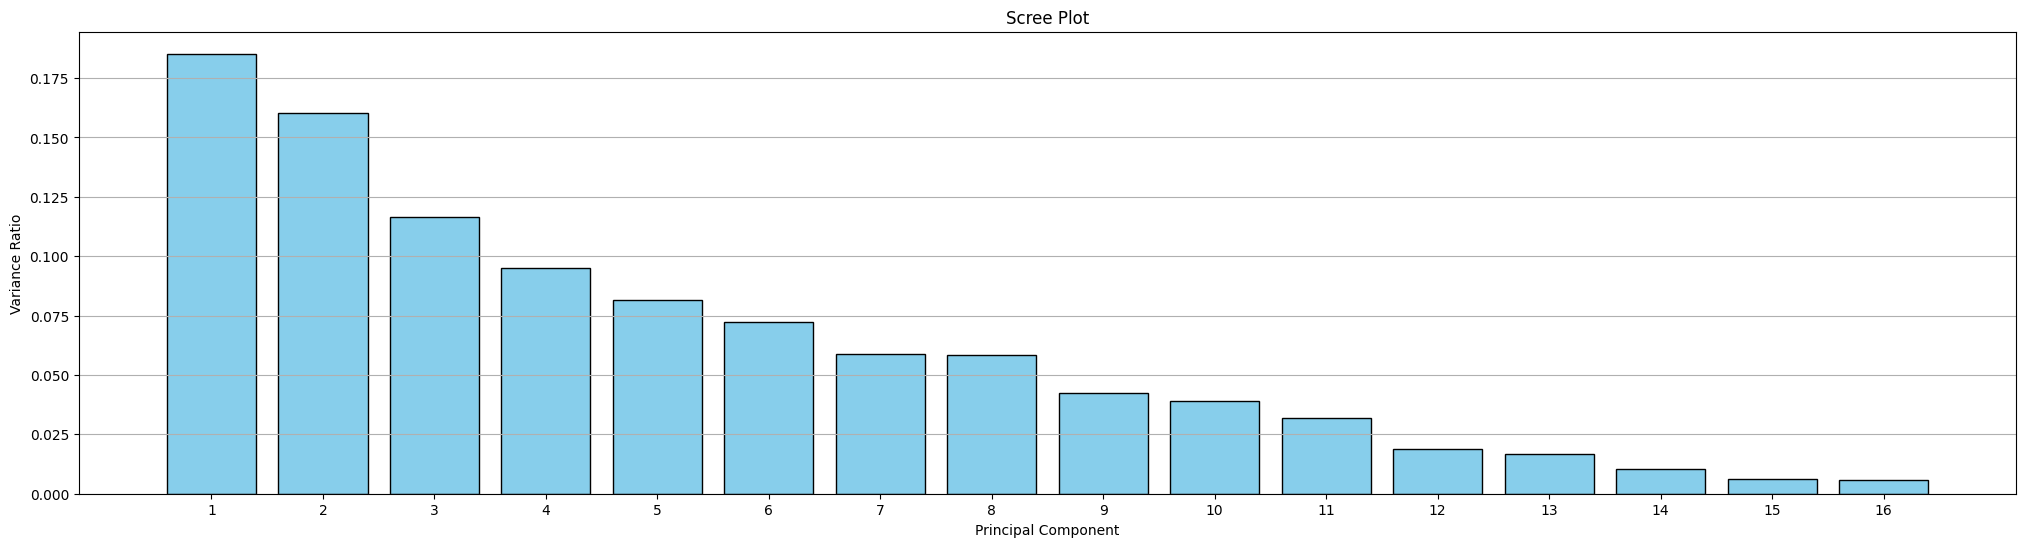

In [103]:
# Assume cocktail_matrix is your original data (ingredient matrix)
pca = PCA()
fit_result = pca.fit(cocktail_matrix)

loadings = pca.components_

# Create a DataFrame for better visualization of loadings
loadings_df = pd.DataFrame(loadings, columns=cocktail_matrix.columns)

# Get loadings for PC1
pc1_loadings = loadings_df.iloc[0]

# Sort the loadings for PC1
sorted_pc1_loadings = pc1_loadings.sort_values(ascending=False)

# Display the top ingredients contributing to PC1
print("Top Ingredients for PC1:")
print(sorted_pc1_loadings)  # Top 10 ingredients

# Get the explained variance ratios
explained_variance = pca.explained_variance_ratio_

# Create a bar plot for the scree plot
plt.figure(figsize=(25, 6))
plt.bar(np.arange(1, len(explained_variance) + 1), explained_variance, color='skyblue', edgecolor='black')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance) + 1))  # Set the x-axis to match component numbers
plt.grid(True, axis='y')  # Add horizontal grid lines for better readability
plt.show()

In [104]:
# Cluster cocktails by ingredients and their volume
from sklearn.preprocessing import QuantileTransformer
from sklearn.cluster import KMeans


# Assuming cocktails_and_ingredients is your original DataFrame
# Create a DataFrame with the relevant columns
volume_df = cocktails_and_ingredients[['cocktail_name', 'ingredient_name', 'volume_oz']].fillna(0.01)

# Create a pivot table to reshape the DataFrame
cocktail_matrix = volume_df.pivot_table(index='cocktail_name',
                                         columns='ingredient_name',
                                         values='volume_oz',
                                         fill_value=0)


# Initialize the QuantileTransformer
quantile_transformer = QuantileTransformer(random_state=42, n_quantiles=100)

# Fit and transform the data
transformed_matrix = quantile_transformer.fit_transform(cocktail_matrix)

# Convert the transformed matrix back to a DataFrame for easier handling
cocktail_matrix = pd.DataFrame(transformed_matrix, index=cocktail_matrix.index, columns=cocktail_matrix.columns)


# Apply K-means clustering
n_clusters = 5  # 5 because: sweet, sour, bitter, spicy and salty
kmeans = KMeans(n_clusters=n_clusters, random_state=20)
clusters = kmeans.fit_predict(cocktail_matrix)

# Add cluster assignments back to original data
results = pd.DataFrame({
    'cocktail': cocktail_matrix.index,
    'cluster': clusters
})

print(results)

# Show cocktails in each cluster
# for cluster in range(n_clusters):
#     print(f"\nCluster {cluster}:")
#     cluster_cocktails = results[results['cluster'] == cluster]['cocktail']
#     print(cluster_cocktails.tolist())
#     # Show common ingredients in this cluster
#     cluster_recipes = cocktail_matrix.loc[cluster_cocktails]
#     # print(f"Cluster recipes: {cluster_recipes}")  # Fixed this line
#     common_ingredients = cluster_recipes.sum().nlargest(5)
#     print("Most common ingredients:", common_ingredients.index.tolist())

                  cocktail  cluster
0    After Dinner Cocktail        3
1    After Supper Cocktail        3
2          Alabama Slammer        4
3          Alaska Cocktail        1
4                Alexander        2
..                     ...      ...
129              Queen Bee        4
130        Queen Charlotte        4
131        Queen Elizabeth        1
132                Quentin        2
133           Whiskey Sour        4

[134 rows x 2 columns]


In [105]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=43)
cocktails_coords = tsne.fit_transform(cocktail_matrix)

cocktail_df = pd.DataFrame(cocktails_coords, columns=['x', 'y'])
cocktail_df['cocktail_name'] = cocktail_matrix.index
cocktail_df['cluster'] = clusters  # Add cluster labels

# Create a color mapping
color_map = {
    0: 'blue',
    1: 'orange',
    2: 'green',
    3: 'red',
    4: 'purple'
}

# Map the cluster labels to colors
cocktail_df['color'] = cocktail_df['cluster'].map(color_map)

# Create the interactive scatter plot with colors
fig = px.scatter(cocktail_df, x='x', y='y',
                 text='cocktail_name',
                 color='color',
                 title='Cocktail Clusters based on Ingredients',
                 color_discrete_sequence=cocktail_df['color'].unique(),
                 width=1200,  # Set the width of the figure
                 height=800)   # Set the height of the figure  # Set discrete colors

fig.update_traces(textposition='top center')  # Adjust text position
fig.show()

In [106]:
cocktails_and_ingredients.query('cocktail_name == "Quentin" | cocktail_name == "Lady Love Fizz"')

,cocktail_id,cocktail_name,ingredient_id,ingredient_name,measure,volume_oz
432,107,Lady Love Fizz,2,Gin,2 oz,2.000000
433,107,Lady Love Fizz,89,Carbonated Water,None,NaN
434,107,Lady Love Fizz,192,Egg White,1,NaN
435,107,Lady Love Fizz,299,lemon,Juice of 1/2,0.760000
436,107,Lady Love Fizz,304,Light Cream,2 tsp,0.270000
437,107,Lady Love Fizz,409,Powdered Sugar,1 tsp,0.135000
527,133,Quentin,179,Dark Rum,1 1/2 oz,1.500000
528,133,Quentin,282,Kahlua,1/2 oz,0.500000
529,133,Quentin,304,Light Cream,1 oz,1.000000
530,133,Quentin,344,Nutmeg,1/8 tsp grated,0.016875


In [107]:
# Jak widać KMeans nie radzi dobrze z klasteryzacją - jeżeli koktajli są w jednem klasterze, całkiem to nie oznacza że są podobne, a jeżeli są blisko siebie na wykresie - to już oznacza,
# dlatego spóbójmy przydzielać kolory koktajlam na podstawie ich głównego alkoholowego składniku

In [108]:
# Get main alcohol ingredient for each cocktail
result_df = cocktails_and_ingredients.set_index('cocktail_name').join(
    cocktails.set_index('name')[['abv']],
    how='left'
).reset_index()  # Reset index to restore 'cocktail_name' as a column

result_df = ingredients[['name', 'type', 'generalized_type']].merge(result_df, left_on = 'name', right_on='ingredient_name', how='inner')

result_df.dropna(subset=['type'], inplace=True)
result_df.drop(columns=['name'], inplace=True)

result_df.sort_values(by='cocktail_name', ascending=True, inplace=True)

result_df

max_volume_type_df = (
    result_df.loc[result_df['generalized_type'] == "Alcoholic"]  # Filter to include only alcoholic ingredients
    .sort_values(by=['cocktail_name', 'volume_oz'], ascending=[True, False])  # Sort by cocktail and volume
    .drop_duplicates(subset=['cocktail_name'], keep='first')  # Keep the row with the largest volume per cocktail
    [['cocktail_name', 'type']]  # Select only relevant columns
)

# Rename column to indicate it's the primary type by volume
max_volume_type_df.rename(columns={'type': 'primary_alcohol_type'}, inplace=True)

# Merge this back into the original DataFrame if desired
result_df = result_df.merge(max_volume_type_df, on='cocktail_name', how='left')

# Display the result
result_df = result_df[['primary_alcohol_type', 'cocktail_name']]
result_df.drop_duplicates(inplace=True)
result_df



,primary_alcohol_type,cocktail_name
0,Brandy,After Dinner Cocktail
3,Brandy,After Supper Cocktail
6,Liqueur,Alabama Slammer
10,Gin,Alaska Cocktail
13,Liqueur,Alexander
...,...,...
397,Vodka,Queen Bee
400,Wine,Queen Charlotte
403,Gin,Queen Elizabeth
405,Rum,Quentin


In [109]:
result_df['primary_alcohol_type'].unique()

array(['Brandy', 'Liqueur', 'Gin', 'Whiskey', 'Fortified Wine', 'Rum',
       'Whisky', 'Vodka', 'Spirit', 'Wine', 'Bitter'], dtype=object)

In [110]:
from sklearn.manifold import TSNE
import pandas as pd
import plotly.express as px

# Run t-SNE
tsne = TSNE(random_state=43)
cocktails_coords = tsne.fit_transform(cocktail_matrix)

# Create a DataFrame for t-SNE coordinates
cocktail_df = pd.DataFrame(cocktails_coords, columns=['x', 'y'])
cocktail_df['cocktail_name'] = cocktail_matrix.index

# Ensure primary alcohol type column is included in cocktail_df
cocktail_df = cocktail_df.merge(result_df[['cocktail_name', 'primary_alcohol_type']], on='cocktail_name', how='left')
cocktail_df.rename(columns={'primary_alcohol_type': 'Primary Alcohol Type'}, inplace=True)

cocktail_df

# Create a color mapping for primary alcohol types
color_map = {
    'Brandy': 'blue',
    'Liqueur': 'orange',
    'Gin': 'green',
    'Whiskey': 'red',
    'Fortified Wine': 'purple',
    'Rum': 'brown',
    'Whisky': 'pink',
    'Vodka': 'gray',
    'Spirit': 'cyan',
    'Wine': 'lime',
    'Bitter': 'olive'
}



# Create the interactive scatter plot with color based on primary alcohol type
fig = px.scatter(
    cocktail_df, x='x', y='y',
    text='cocktail_name',
    color='Primary Alcohol Type',  # Set color based on type
    title='Cocktail Clusters based on Ingredients',
    color_discrete_map=color_map,  # Apply color map
    width=1200,  # Set the width of the figure
    height=800   # Set the height of the figure
)

fig.update_traces(textposition='top center')  # Adjust text position
fig.show()


In [111]:
# Takie podejście nadal nie jest idealne, bo czasami koktajli mają kilka alkoholowych składników o tej samej objętości,
# ale teraz kolory choćby mają sens i nawet widać że koktajli o tych samych podstawach zazwyczaj są blisko siebie

In [112]:
cocktails_and_ingredients.query('cocktail_name == "Margarita" | cocktail_name == "Blue Margarita"')

,cocktail_id,cocktail_name,ingredient_id,ingredient_name,measure,volume_oz
28,7,Margarita,4,Tequila,1 1/2 oz,1.5
29,7,Margarita,308,Lime Juice,1 oz,1.0
30,7,Margarita,439,Salt,None,NaN
31,7,Margarita,498,Triple Sec,1/2 oz,0.5
156,42,Blue Margarita,4,Tequila,1 1/2 oz,1.5
157,42,Blue Margarita,67,Blue Curacao,1 oz,1.0
158,42,Blue Margarita,308,Lime Juice,1 oz,1.0
159,42,Blue Margarita,439,Salt,Coarse,NaN


In [113]:
# Teraz możemy spróbować zgrupować koktajli na podstawie ich "stylu" przygotowywania: Glass, ABV, Num ingredients, Prep method
from sklearn.preprocessing import OneHotEncoder

# Create a copy of cocktails table
cocktails_copy = cocktails.copy()

# Encode Strength(not ABV because we have a lot of missing data for it), glasses and prep_method
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(cocktails_copy[['glass', 'prep_method', 'strength']])

encoded_df = pd.DataFrame(
    encoded_features,
    columns=encoder.get_feature_names_out(['glass', 'prep_method', 'strength']),
    index=cocktails_copy.index
)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
cocktails_copy = pd.concat([cocktails_copy['name'], encoded_df], axis=1)


# Transform data
cocktails_matrix = encoded_df
quantile_transformer = QuantileTransformer(random_state=42, n_quantiles=100)
transformed_matrix = quantile_transformer.fit_transform(cocktails_matrix)

tsne = TSNE(random_state=42)
cocktails_coords = tsne.fit_transform(transformed_matrix)

# Create a DataFrame for t-SNE coordinates
cocktail_df = pd.DataFrame(cocktails_coords, columns=['x', 'y'])
cocktail_df = pd.concat([cocktails_copy['name'], cocktail_df], axis=1)

# Ensure primary alcohol type column is included in cocktail_df
cocktail_df = cocktail_df.merge(result_df[['cocktail_name', 'primary_alcohol_type']], left_on='name', right_on='cocktail_name', how='left')
cocktail_df.rename(columns={'primary_alcohol_type': 'Primary Alcohol Type'}, inplace=True)

cocktail_df

# Create a color mapping for primary alcohol types
color_map = {
    'Brandy': 'blue',
    'Liqueur': 'orange',
    'Gin': 'green',
    'Whiskey': 'red',
    'Fortified Wine': 'purple',
    'Rum': 'brown',
    'Whisky': 'pink',
    'Vodka': 'gray',
    'Spirit': 'cyan',
    'Wine': 'lime',
    'Bitter': 'olive'
}

# Map primary alcohol type to colors
cocktail_df['color'] = cocktail_df['Primary Alcohol Type'].map(color_map)

# Create the interactive scatter plot with color based on primary alcohol type
fig = px.scatter(
    cocktail_df, x='x', y='y',
    text='cocktail_name',
    color='Primary Alcohol Type',  # Set color based on type
    title='Cocktail Clusters based on Style',
    color_discrete_map=color_map,  # Apply color map
    width=1200,  # Set the width of the figure
    height=800   # Set the height of the figure
)

fig.update_traces(textposition='top center')  # Adjust text position
fig.show()


In [114]:
cocktails.query('name == "Amaretto Tea" | name == "Harvey Wallbanger"')

,name,category,glass,tags,instructions,abv,strength,instruction_length,num_ingredients,prep_method
26,Amaretto Tea,Ordinary Drink,Pousse cafe glass,None,"Pour hot tea into a pousse-cafe glass, using a...",7.000000,Weak,155,3,Stir
94,Harvey Wallbanger,Ordinary Drink,Collins glass,"[IBA, ContemporaryClassic]",Stir the vodka and orange juice with ice in th...,9.818182,Weak,105,3,Stir


In [115]:
    # Ciekawy wykres dla segregacji koktajli, można odkryć dla sobie nowe koktajli przyrządzane podobnie do ulubionych